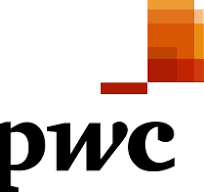

# 📊 Telecom Customer Churn Analysis – PwC Consulting Case Study

## **📌 Background**
The telecom industry is highly competitive, and customers frequently switch providers for better pricing, improved service quality, or enhanced customer experience. The company is losing a significant percentage of customers every month, affecting revenue and profitability. The CEO wants to understand:

- Who are the customers that are churning?
- What factors contribute to churn the most?
- How can the company proactively predict and prevent churn?

PwC has tasked your team with conducting an exploratory data analysis (EDA) on customer demographics and behaviors, followed by building a churn prediction model to identify key risk factors leading to customer churn.

---

## **📈 Phase 1: Understanding the Customer Base**
### **Objective:** Summarize key customer insights

### **1. Churn Percentage**  
- What percentage of customers are leaving?  

### **2. Customer Segments**  
- Analyze customer demographics (Age, Gender, Tenure).  

### **3. Services Used**  
- Do churned customers have **Internet, Phone, or TV services**?  

### **4. Billing & Payment Methods**  
- Do churned customers prefer **paperless billing, credit cards, or bank transfers**?  

### **5. Contract Types**  
- Are **monthly contract customers** churning more than **annual contract customers**?  

---

## **🤖 Phase 2: Predicting Customer Churn**
### **Objective:** Build a churn prediction model to identify at-risk customers.

### **1. Feature Selection**
Identify key factors influencing churn, such as tenure, contract type, payment method, and monthly charges.

### **2. Model Training**
Train a classification model (Logistic Regression, Decision Tree, or XGBoost) to predict churn.

### **3. Performance Evaluation**
Assess model accuracy, precision, recall, F1-score, and AUC-ROC to measure effectiveness.

### **4. Key Insights & Recommendations**
Analyze feature importance, identify top churn drivers, and provide data-driven retention strategies.


# 1. Import the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pwc = pd.read_excel("/content/drive/MyDrive/Studing BA/Data file/02 Churn-Dataset.xlsx")

In [ ]:
pwc.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


# 2. Data preparation & Cleaning

In [ ]:
pwc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
pwc.drop_duplicates(inplace=True)
pwc['TotalCharges'] = pd.to_numeric(pwc['TotalCharges'], errors='coerce')
pwc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
pwc.isna().sum()
pwc.dropna(inplace=True)
pwc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [ ]:
pwc['Churn']

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [ ]:
# Convert 'Churn' column to numeric
pwc['Churn'] = pwc['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
pwc['Churn'].value_counts()

,count
Churn,
0,5163
1,1869


In [ ]:
pwc.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,0,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,1


# 3. Exploratory Data Analysis

In [ ]:
# Check basic statistics (mean, median, min, max, etc.)
pwc.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.514932,0.420222,0.265785
std,0.368844,24.545260,30.085974,2266.771362,1.273921,1.250984,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,0.000000,0.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,5.000000,9.000000,1.000000


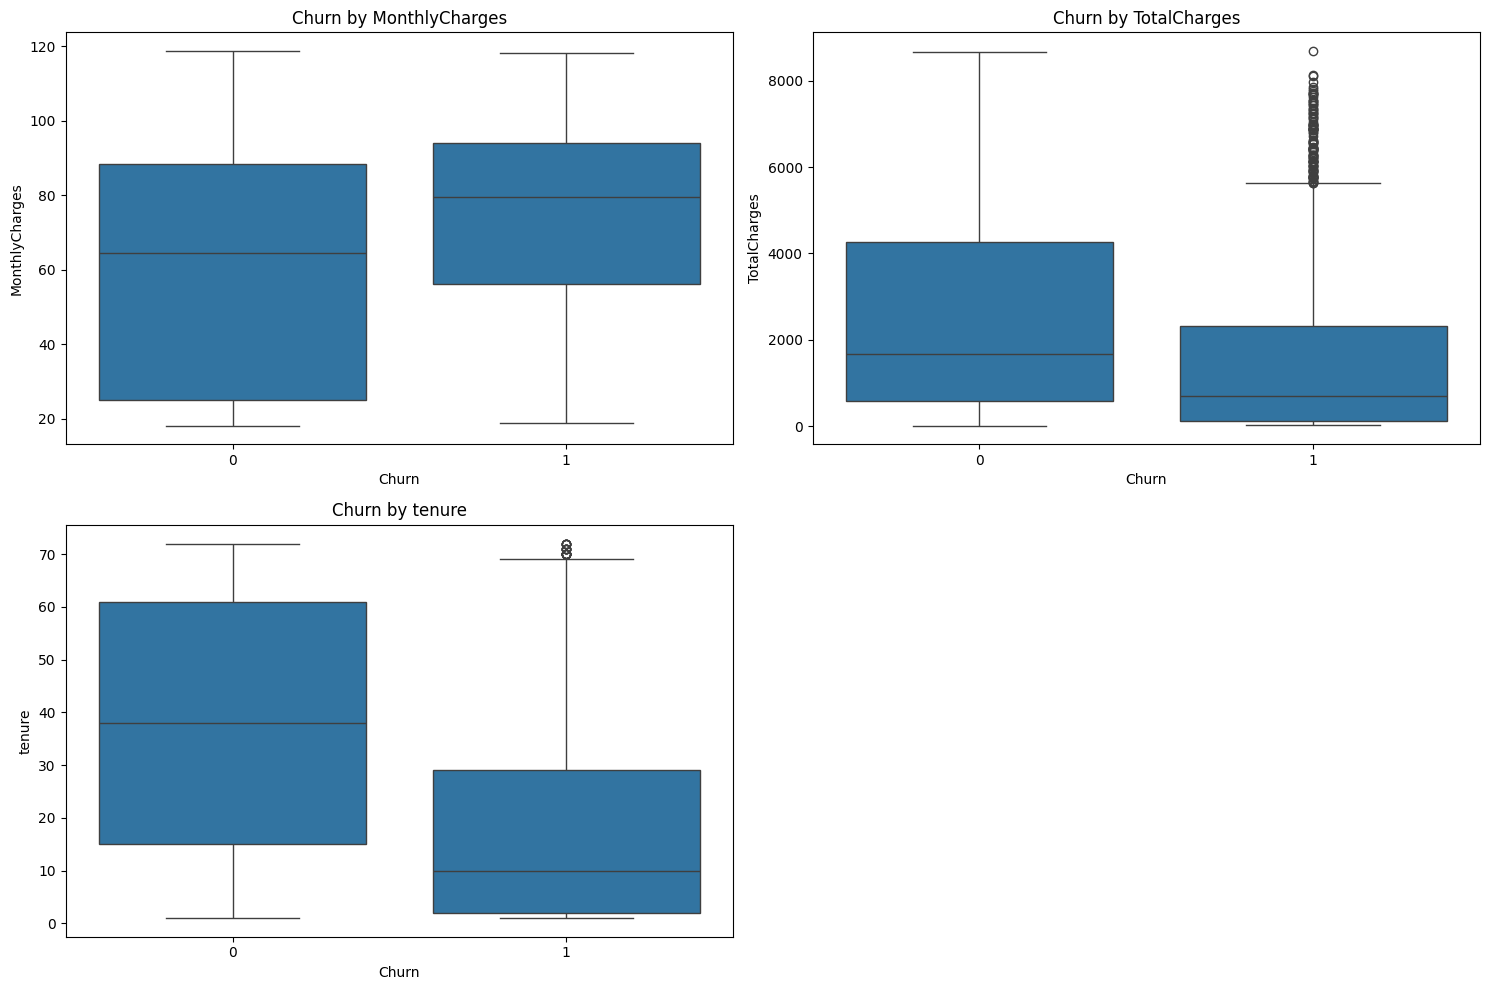

In [ ]:
# Numerical variables - compare distributions
numerical_cols = ['MonthlyCharges', 'TotalCharges', 'tenure']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Churn', y=column, data=pwc)
    plt.title(f'Churn by {column}')
plt.tight_layout()
plt.show()

In [ ]:
pwc.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'Churn'],
      dtype='object')

In [ ]:
# List of categorical columns
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
      'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'numAdminTickets','numTechTickets', 'Churn']

# Display frequency counts for each categorical column
for col in categorical_cols:
    print(f"Frequency counts for {col}:")
    print(pwc[col].value_counts())
    print("\n")

Frequency counts for gender:
gender
Male      3549
Female    3483
Name: count, dtype: int64


Frequency counts for SeniorCitizen:
SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64


Frequency counts for Partner:
Partner
No     3639
Yes    3393
Name: count, dtype: int64


Frequency counts for Dependents:
Dependents
No     4933
Yes    2099
Name: count, dtype: int64


Frequency counts for PhoneService:
PhoneService
Yes    6352
No      680
Name: count, dtype: int64


Frequency counts for MultipleLines:
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64


Frequency counts for InternetService:
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64


Frequency counts for OnlineSecurity:
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64


Frequency counts for OnlineBackup:
OnlineBackup
No             

# 4. Churn Analysis (Customer demographic analysis)

In [ ]:
overall_churn_rate = pwc['Churn'].mean() * 100
print(f"Overall Churn Rate: {overall_churn_rate:.2f}%")

Overall Churn Rate: 26.58%


In [ ]:
pwc['Churn'].value_counts()

,count
Churn,
0,5163
1,1869


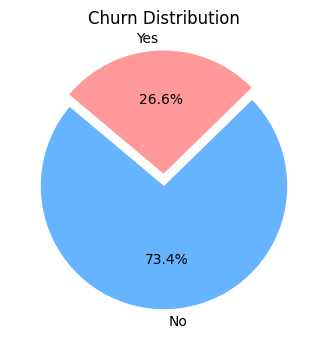

In [ ]:
# Get churn counts
churn_counts = pwc['Churn'].value_counts()

# Define your mapping
churn_labels = {0: 'No', 1: 'Yes'}

# Define explode (still exploding the "Yes" slice)
explode = (0, 0.1)

# Get values in correct order
values = [churn_counts.get(0, 0), churn_counts.get(1, 0)]
labels = ['No', 'Yes']

# Plot the pie chart
# explode (phần nào cần có nhắn mạnh thì mình cho nó nổ ra)
plt.figure(figsize=(4, 4))
plt.pie(values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=['#66b3ff','#ff9999'],
        explode=explode)
plt.title('Churn Distribution')
plt.show()

In [ ]:
pwc.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'Churn'],
      dtype='object')

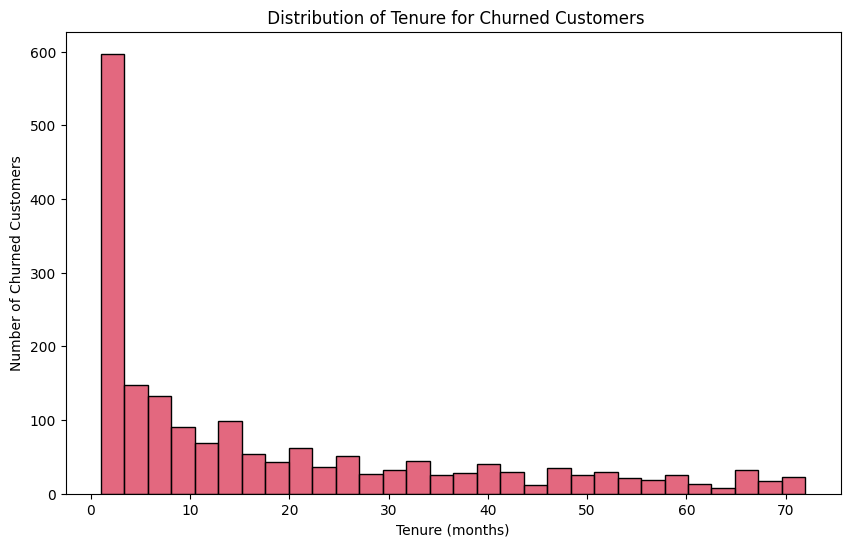

In [ ]:
# churn vs distribution of tenure
churned_customers = pwc[pwc['Churn'] == 1]

plt.figure(figsize=(10, 6))
ax = plt.gca()
sns.histplot(churned_customers['tenure'], bins=30, color='#DA3654')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Churned Customers')
plt.title(' Distribution of Tenure for Churned Customers')
plt.show()

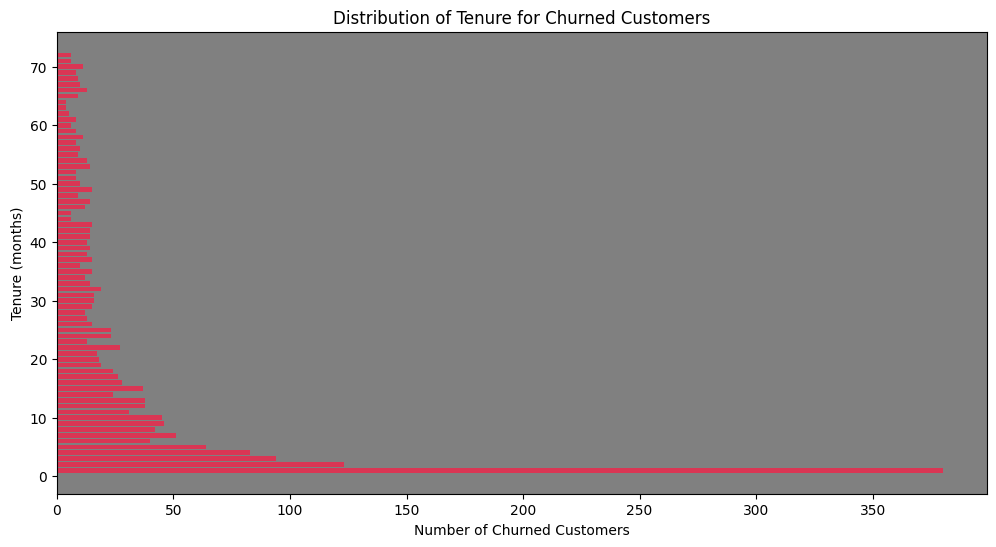

In [ ]:
# prompt: write the code to create "Distribution of Tenure for Churned Customers"  bar chart but using plt.barh and make the bar horizontal (and change the background color in the graph to gray)

import matplotlib.pyplot as plt
# churn vs distribution of tenure using plt.barh
churned_customers = pwc[pwc['Churn'] == 1]

tenure_counts = churned_customers['tenure'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
ax = plt.gca()
ax.set_facecolor('gray')  # Set background color to gray


plt.barh(tenure_counts.index, tenure_counts.values, color='#DA3654')
plt.xlabel('Number of Churned Customers')
plt.ylabel('Tenure (months)')
plt.title('Distribution of Tenure for Churned Customers')
plt.show()


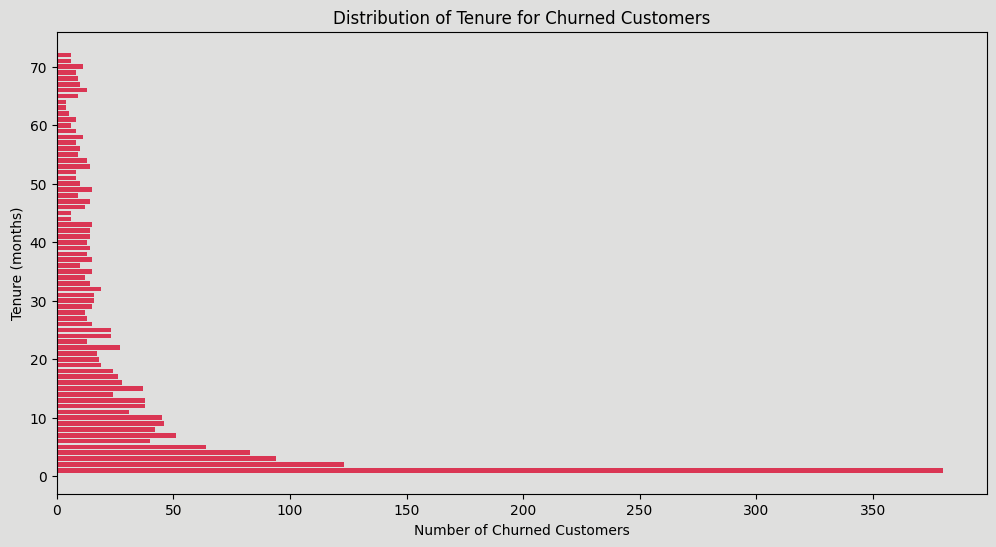

In [ ]:
# prompt: write the code to create "Distribution of Tenure for Churned Customers"  bar chart but using plt.barh and make the bar horizontal (and change the background color both in the graph and outside the graph to gray)

import matplotlib.pyplot as plt
# churn vs distribution of tenure using plt.barh
churned_customers = pwc[pwc['Churn'] == 1]

tenure_counts = churned_customers['tenure'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
ax = plt.gca()
ax.set_facecolor('#DFDFDE')  # Set background color of the plot to gray

# Set background color outside the plot to gray
plt.gcf().set_facecolor('#DFDFDE')


plt.barh(tenure_counts.index, tenure_counts.values, color='#DA3654')
plt.xlabel('Number of Churned Customers')
plt.ylabel('Tenure (months)')
plt.title('Distribution of Tenure for Churned Customers')
plt.show()


<ipython-input-111-c5fc678add04>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tenure_churn.index, y='churn_rate', data=tenure_churn, palette=colors)


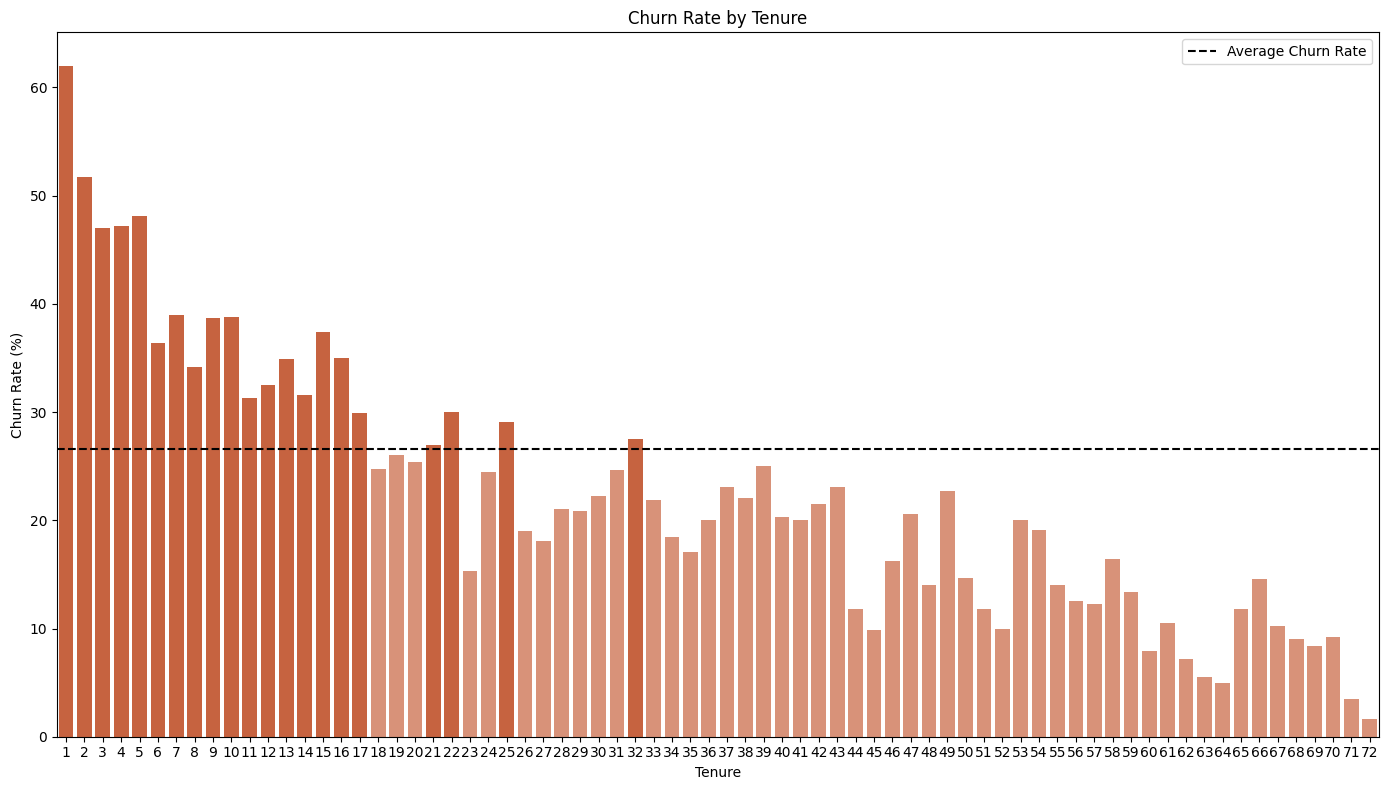

In [ ]:
#Calculate churn rate by tenure
tenure_churn = pwc.groupby('tenure')['Churn'].agg(['mean', 'count'])
tenure_churn['churn_rate'] = tenure_churn['mean'] * 100

# Highlight categories that are above the average churn rate
highlight_tenure = tenure_churn[tenure_churn['churn_rate'] >= overall_churn_rate].index

# Plot the results with highlighted categories
plt.figure(figsize=(14, 8))
colors = ['#DC582A' if tenure in highlight_tenure else '#E88B69' for tenure in tenure_churn.index]
sns.barplot(x=tenure_churn.index, y='churn_rate', data=tenure_churn, palette=colors)
plt.title('Churn Rate by Tenure')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Tenure')
plt.axhline(y=pwc['Churn'].mean()*100, color='#000000', linestyle='--', label='Average Churn Rate')
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-112-007070731cc8>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_group_churn = pwc.groupby('tenure_group')['Churn'].agg(['mean', 'count'])
<ipython-input-112-007070731cc8>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tenure_group_churn.index, y='churn_rate', data=tenure_group_churn, palette=colors)


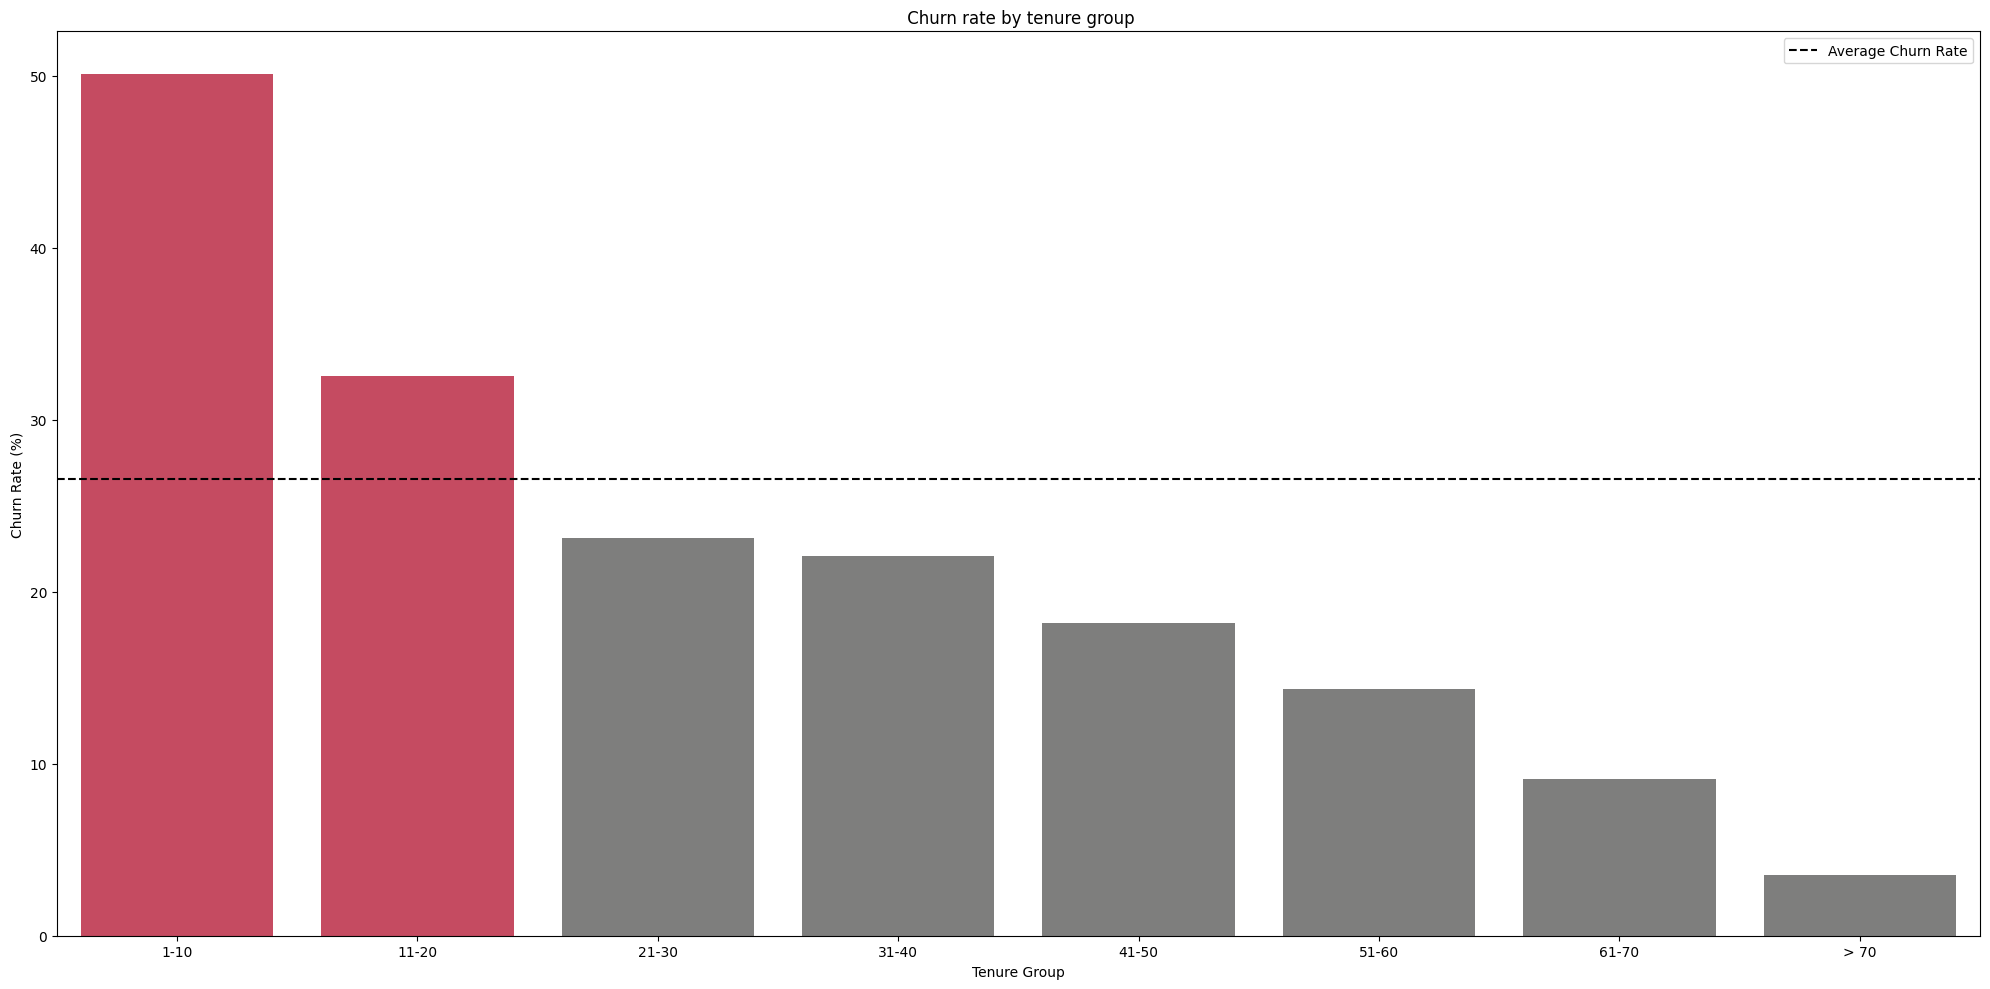

In [ ]:
# Group tenure into bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '> 70']
pwc['tenure_group'] = pd.cut(pwc['tenure'], bins=bins, labels=labels, right=False)

# Calculate churn rate by tenure group
tenure_group_churn = pwc.groupby('tenure_group')['Churn'].agg(['mean', 'count'])
tenure_group_churn['churn_rate'] = tenure_group_churn['mean'] * 100
tenure_group_churn = tenure_group_churn.sort_values(by='churn_rate', ascending=False)

# Highlight categories that are above the average churn rate
highlight_tenure_groups = tenure_group_churn[tenure_group_churn['churn_rate'] >= overall_churn_rate].index

# Plot the results with highlighted categories
plt.figure(figsize=(20, 10))
colors = ['#DA3654' if group in highlight_tenure_groups else '#7E7E7D' for group in tenure_group_churn.index]
sns.barplot(x=tenure_group_churn.index, y='churn_rate', data=tenure_group_churn, palette=colors)

plt.ylabel('Churn Rate (%)')
plt.xlabel('Tenure Group')
plt.title(' Churn rate by tenure group')
plt.axhline(y=overall_churn_rate, color='#000000', linestyle='--', label='Average Churn Rate')
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-113-4fd4017df12d>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_group_churn = pwc.groupby('tenure_group')['Churn'].agg(['mean', 'count'])
<ipython-input-113-4fd4017df12d>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=tenure_group_churn.index, x='churn_rate', data=tenure_group_churn, palette=colors, orient='h')


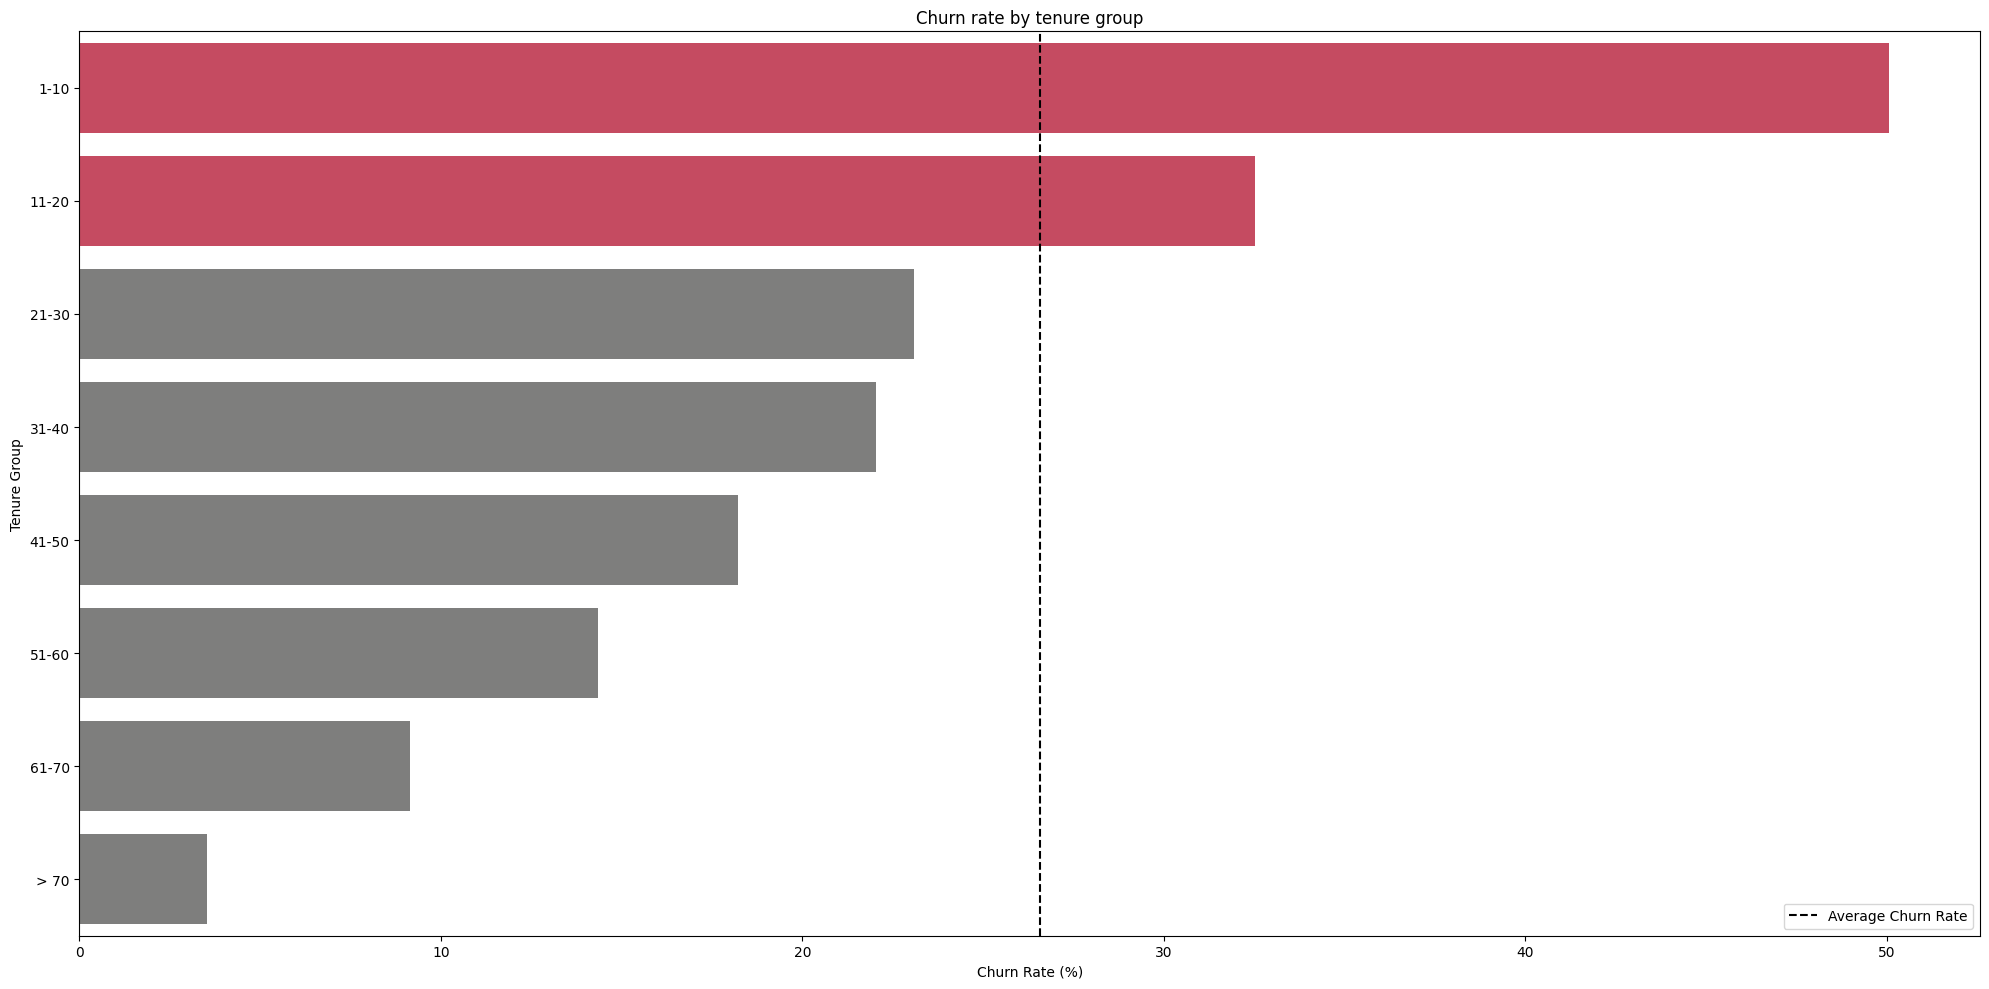

In [ ]:
# prompt: rotate the "Figure 2: Churn rate by tenure group" bar chart to horizontal

import pandas as pd
import matplotlib.pyplot as plt
# Group tenure into bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '> 70']
pwc['tenure_group'] = pd.cut(pwc['tenure'], bins=bins, labels=labels, right=False)

# Calculate churn rate by tenure group
tenure_group_churn = pwc.groupby('tenure_group')['Churn'].agg(['mean', 'count'])
tenure_group_churn['churn_rate'] = tenure_group_churn['mean'] * 100
tenure_group_churn = tenure_group_churn.sort_values(by='churn_rate', ascending=False)

# Highlight categories that are above the average churn rate
highlight_tenure_groups = tenure_group_churn[tenure_group_churn['churn_rate'] >= overall_churn_rate].index

# Plot the results with highlighted categories
plt.figure(figsize=(20, 10))
colors = ['#DA3654' if group in highlight_tenure_groups else '#7E7E7D' for group in tenure_group_churn.index]
sns.barplot(y=tenure_group_churn.index, x='churn_rate', data=tenure_group_churn, palette=colors, orient='h')

plt.xlabel('Churn Rate (%)')
plt.ylabel('Tenure Group')
plt.title('Churn rate by tenure group')
plt.axvline(x=overall_churn_rate, color='#000000', linestyle='--', label='Average Churn Rate')
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-114-4fb6649fae44>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churned_gender_counts.index, y=churned_gender_counts.values, palette = ["#7E7E7D","#DA3654"])  # Customize colors
<ipython-input-114-4fb6649fae44>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


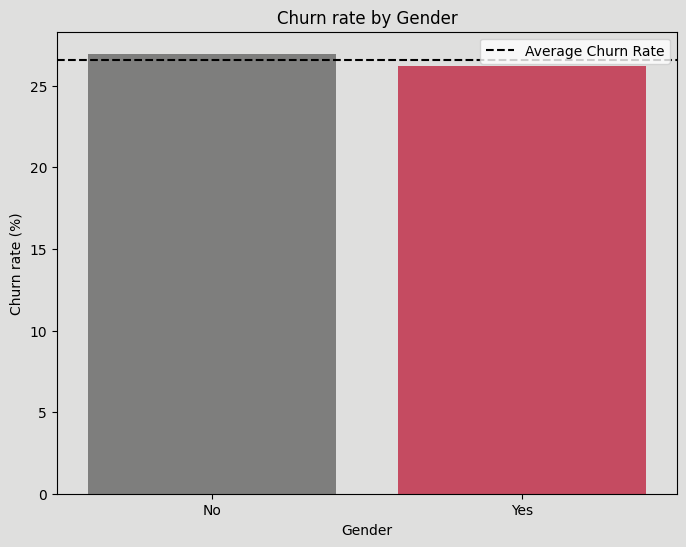

In [ ]:
# Calculate the percentage of churned customers by gender
churned_gender_counts =  pwc.groupby('gender')['Churn'].mean() * 100

# Create the bar chart
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_facecolor('#DFDFDE')  # Set background color of the plot to gray
plt.gcf().set_facecolor('#DFDFDE') # Set background color outside the plot to gray
ax = sns.barplot(x=churned_gender_counts.index, y=churned_gender_counts.values, palette = ["#7E7E7D","#DA3654"])  # Customize colors
plt.xlabel('Gender')
plt.ylabel('Churn rate (%)')
plt.title('Churn rate by Gender')
plt.axhline(y=pwc['Churn'].mean()*100, color='#000000', linestyle='--', label='Average Churn Rate')
ax.set_xticklabels(['No', 'Yes'])
plt.legend()
plt.show()


<ipython-input-115-d9d725691f6d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churned_dependents_percentage.index, y=churned_dependents_percentage.values, palette=["#7E7E7D","#DA3654"])
<ipython-input-115-d9d725691f6d>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


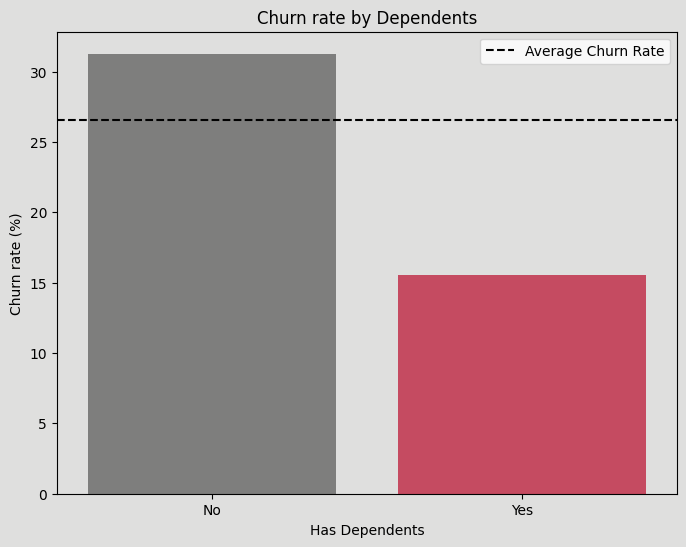

In [ ]:
# Calculate the percentage of churned customers with dependents
churned_dependents_percentage =  pwc.groupby('Dependents')['Churn'].mean() * 100

# Create the bar chart
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_facecolor('#DFDFDE')  # Set background color of the plot to gray
plt.gcf().set_facecolor('#DFDFDE') # Set background color outside the plot to gray
ax = sns.barplot(x=churned_dependents_percentage.index, y=churned_dependents_percentage.values, palette=["#7E7E7D","#DA3654"])
plt.xlabel('Has Dependents')
plt.ylabel('Churn rate (%)')
plt.title('Churn rate by Dependents')
plt.axhline(y=pwc['Churn'].mean()*100, color='#000000', linestyle='--', label='Average Churn Rate')
ax.set_xticklabels(['No', 'Yes'])
plt.legend()
plt.show()


<ipython-input-116-306716f2a967>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churned_senior_percentage.index, y=churned_senior_percentage.values, palette=["#7E7E7D","#DA3654"])
<ipython-input-116-306716f2a967>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


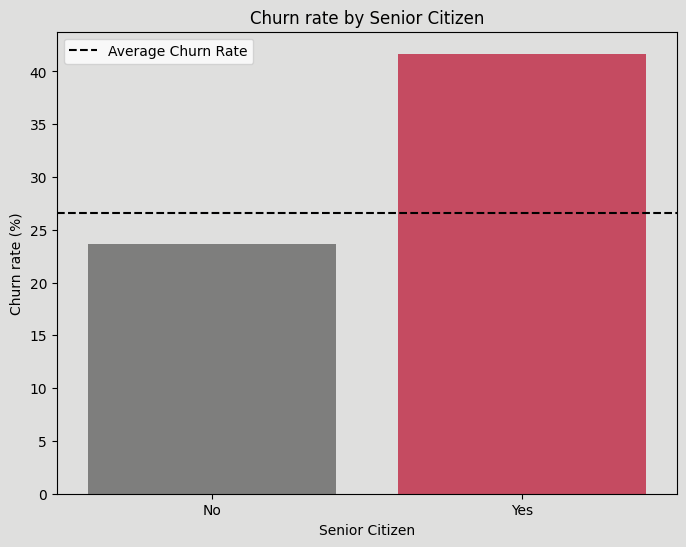

In [ ]:
# Calculate the percentage of churned customers with Senior Citizen
churned_senior_percentage =  pwc.groupby('SeniorCitizen')['Churn'].mean() * 100

# Create the bar chart
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_facecolor('#DFDFDE')  # Set background color of the plot to gray
plt.gcf().set_facecolor('#DFDFDE') # Set background color outside the plot to gray
ax = sns.barplot(x=churned_senior_percentage.index, y=churned_senior_percentage.values, palette=["#7E7E7D","#DA3654"])
plt.xlabel('Senior Citizen')
plt.ylabel('Churn rate (%)')
plt.title('Churn rate by Senior Citizen')
plt.axhline(y=pwc['Churn'].mean()*100, color='#000000', linestyle='--', label='Average Churn Rate')
ax.set_xticklabels(['No', 'Yes'])
plt.legend()
plt.show()


<ipython-input-117-c79cbac5cd53>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churned_partner_percentage.index, y=churned_partner_percentage.values, palette=["#7E7E7D","#DA3654"])
<ipython-input-117-c79cbac5cd53>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


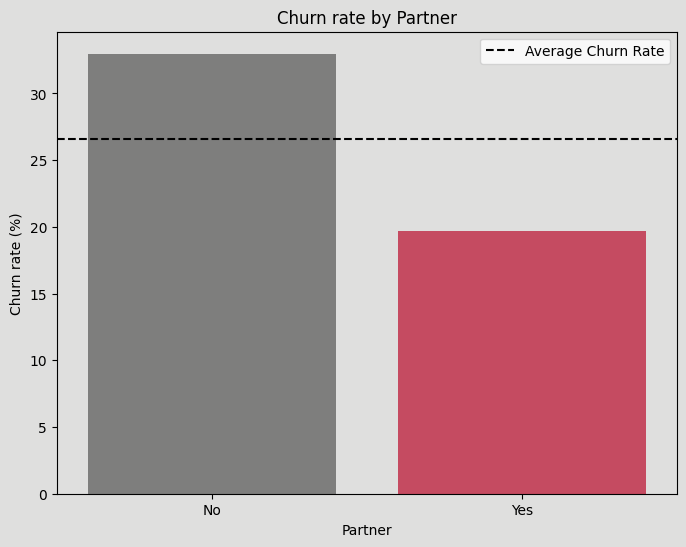

In [ ]:
# Calculate the percentage of churned customers with Partner
churned_partner_percentage =  pwc.groupby('Partner')['Churn'].mean() * 100
# Create the bar chart
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_facecolor('#DFDFDE')  # Set background color of the plot to gray
plt.gcf().set_facecolor('#DFDFDE') # Set background color outside the plot to gray
ax = sns.barplot(x=churned_partner_percentage.index, y=churned_partner_percentage.values, palette=["#7E7E7D","#DA3654"])
plt.xlabel('Partner')
plt.ylabel('Churn rate (%)')
plt.title('Churn rate by Partner')
plt.axhline(y=pwc['Churn'].mean()*100, color='#000000', linestyle='--', label='Average Churn Rate')
ax.set_xticklabels(['No', 'Yes'])
plt.legend()
plt.show()

<ipython-input-118-b6baeca54cd5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=service_churn.index, y='churn_rate', data=service_churn,  palette = ["#7E7E7D","#DA3654"])
<ipython-input-118-b6baeca54cd5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=service_churn.index, y='churn_rate', data=service_churn,  palette = ["#7E7E7D","#DA3654"])
<ipython-input-118-b6baeca54cd5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=service_churn.index, y='churn_rate', data=service_churn,  palette = ["#7E7E7D","#DA3654"])
<ipython-input-118-

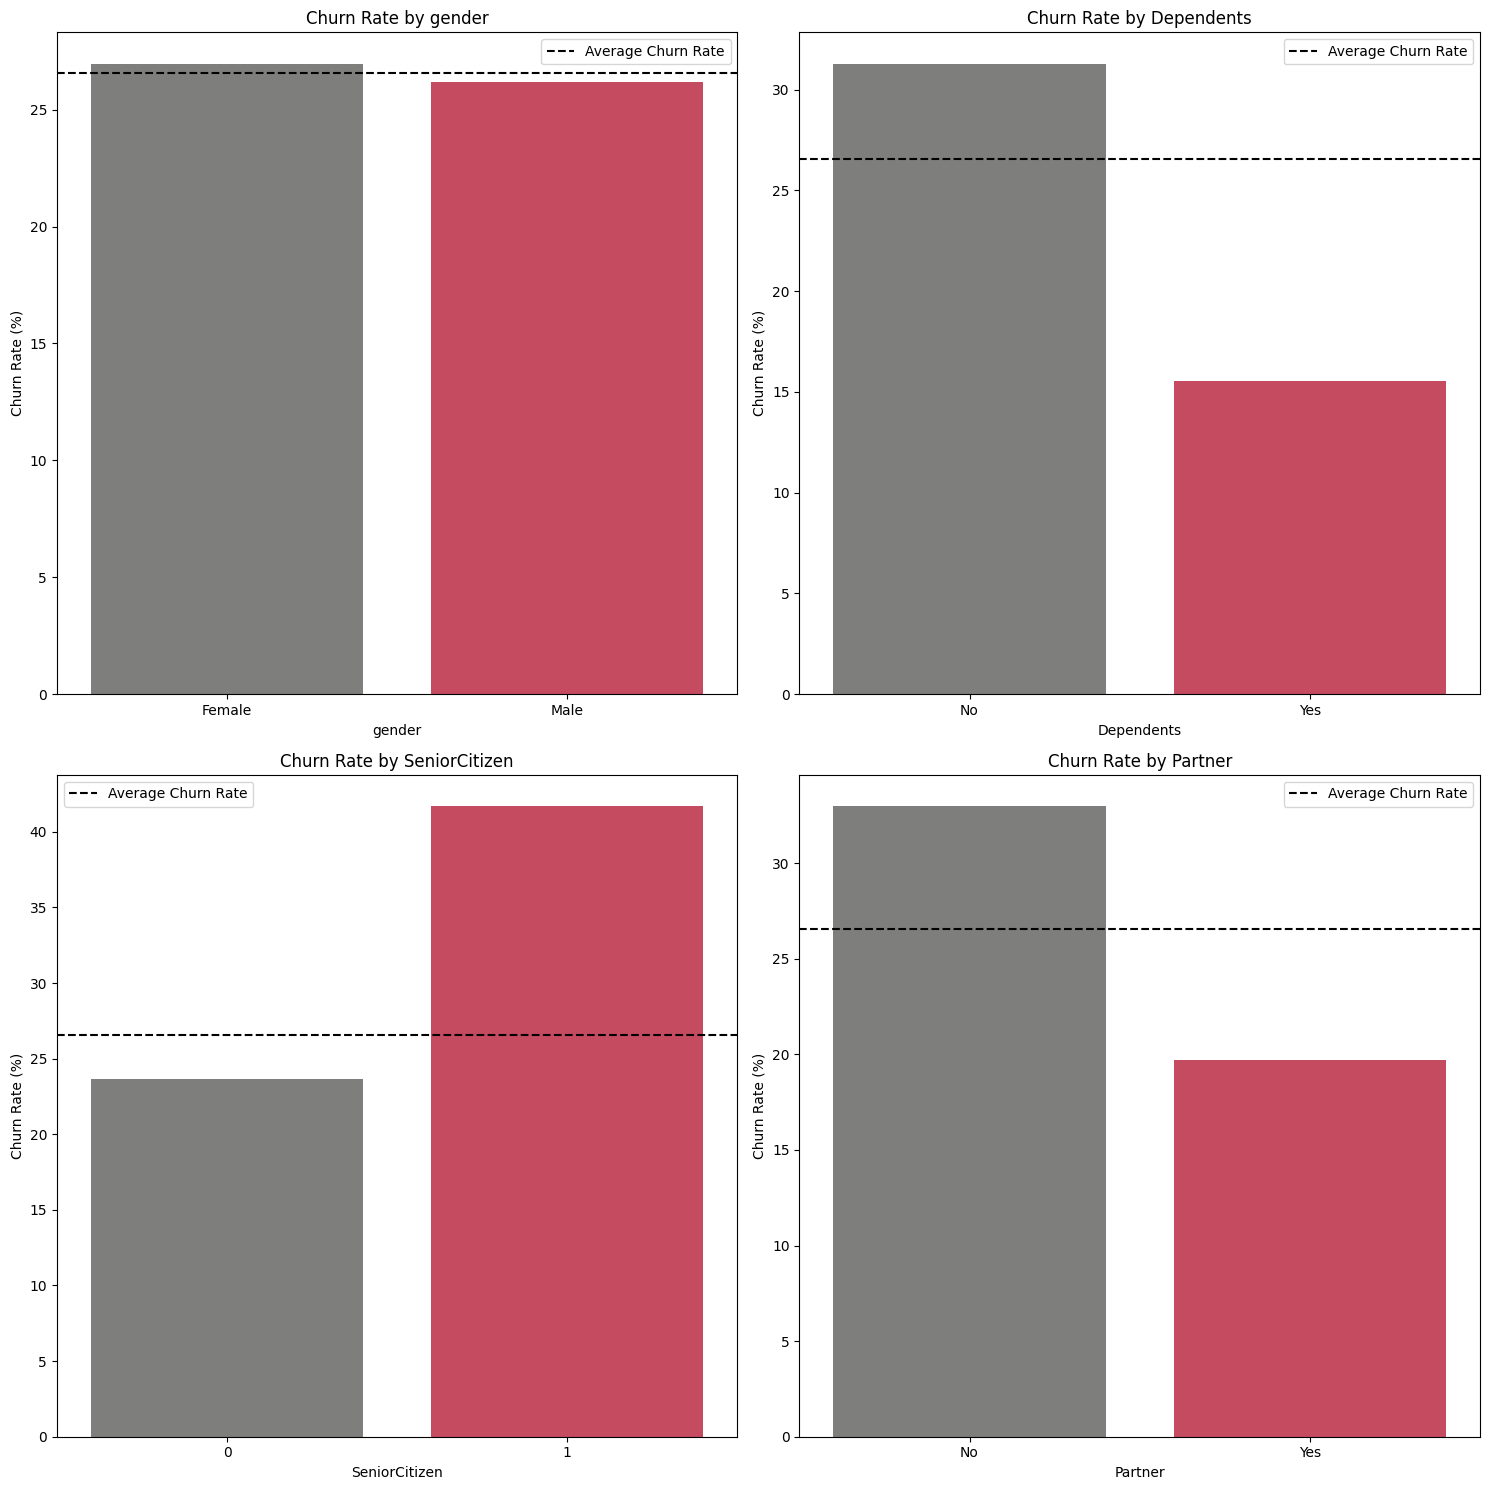

In [ ]:
service_cols = ['gender','Dependents', 'SeniorCitizen', 'Partner']

# Create subplots
plt.figure(figsize=(15, 15))
for i, col in enumerate(service_cols):
    plt.subplot(2, 2, i + 1)
    service_churn = pwc.groupby(col)['Churn'].agg(['mean', 'count'])
    service_churn['churn_rate'] = service_churn['mean'] * 100
    service_churn = service_churn.sort_values('churn_rate', ascending=False)
    sns.barplot(x=service_churn.index, y='churn_rate', data=service_churn,  palette = ["#7E7E7D","#DA3654"])
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate (%)')
    plt.xlabel(col)
    plt.axhline(y=pwc['Churn'].mean()*100, color='#000000', linestyle='--', label='Average Churn Rate')
    plt.legend()

plt.tight_layout()
plt.show()


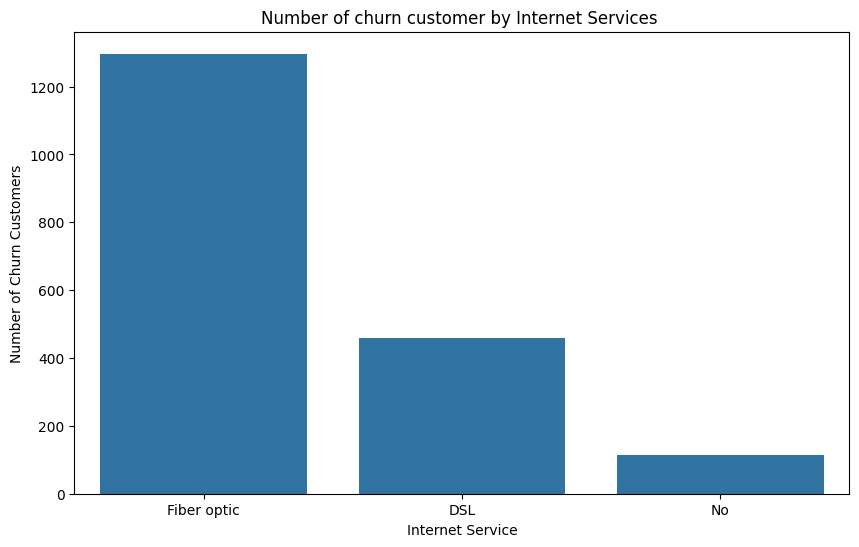

In [ ]:
# Group by Internet Service and count churned customers
churn_by_internet_service =  pwc[pwc['Churn'] == 1]['InternetService'].value_counts()

# Sort the counts in descending order
churn_by_internet_service = churn_by_internet_service.sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_internet_service.index, y=churn_by_internet_service.values)
plt.xlabel('Internet Service')
plt.ylabel('Number of Churn Customers')
plt.title('Number of churn customer by Internet Services ')
plt.show()


In [ ]:
pwc['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3096
DSL,2416
No,1520


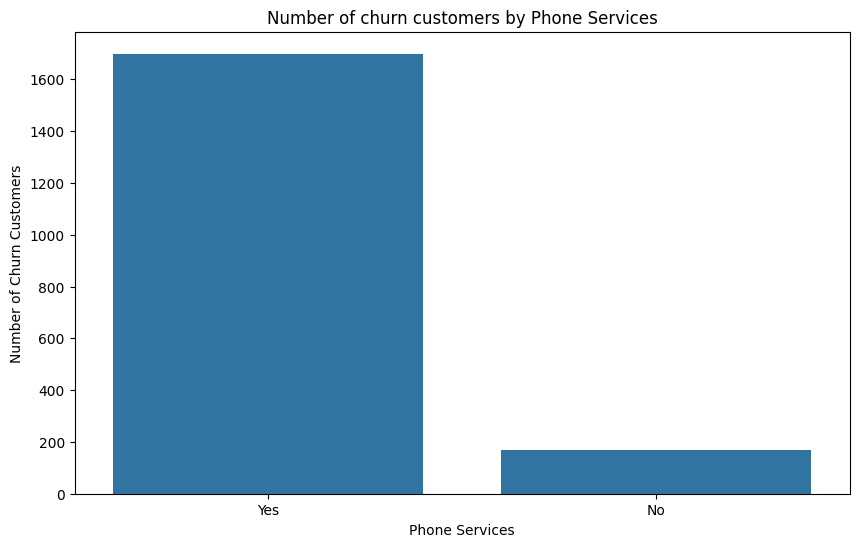

In [ ]:
# Group by Phone Service and count churned customers
churn_by_phone_service =  pwc[pwc['Churn'] == 1]['PhoneService'].value_counts()

# Sort the counts in descending order
churn_by_phone_service = churn_by_phone_service.sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_phone_service.index, y=churn_by_phone_service.values)
plt.xlabel('Phone Services')
plt.ylabel('Number of Churn Customers')
plt.title('Number of churn customers by Phone Services')
plt.show()

In [ ]:
pwc['PhoneService'].value_counts()

,count
PhoneService,
Yes,6352
No,680


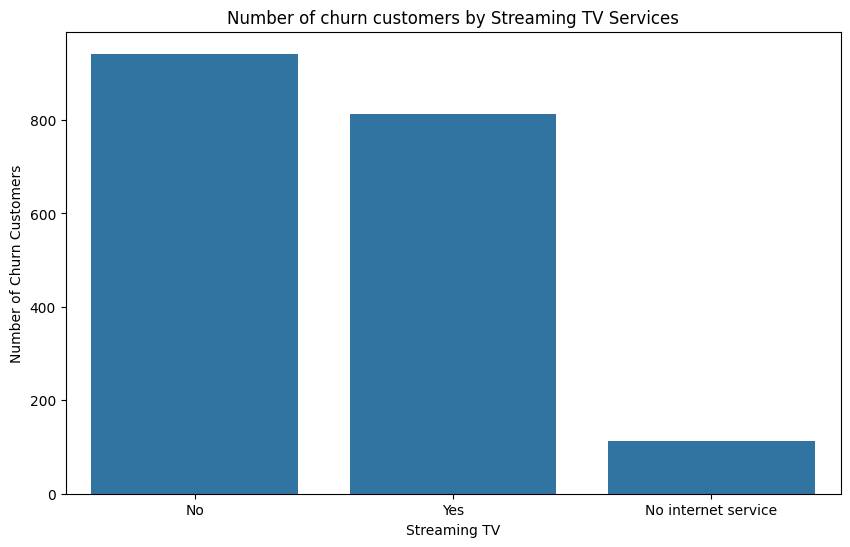

In [ ]:
# Group by Streaming TV and count churned customers
churn_by_TV_service =  pwc[pwc['Churn'] == 1]['StreamingTV'].value_counts()

# Sort the counts in descending order
churn_by_TV_service = churn_by_TV_service.sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_TV_service.index, y=churn_by_TV_service.values)
plt.xlabel('Streaming TV')
plt.ylabel('Number of Churn Customers')
plt.title('Number of churn customers by Streaming TV Services')
plt.show()

In [ ]:
pwc['StreamingTV'].value_counts()

,count
StreamingTV,
No,2809
Yes,2703
No internet service,1520


<ipython-input-125-4a529baff0b3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=service_churn.index, y='churn_rate', data=service_churn, palette = ["#7E7E7D","#DA3654", "#DFDFDE"])
<ipython-input-125-4a529baff0b3>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])
<ipython-input-125-4a529baff0b3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=service_churn.index, y='churn_rate', data=service_churn, palette = ["#7E7E7D","#DA3654", "#DFDFDE"])
<ipython-input-125-4a529baff0b3>:10: UserWarning: The palette list has more values (3) than needed (2), which may not be inte

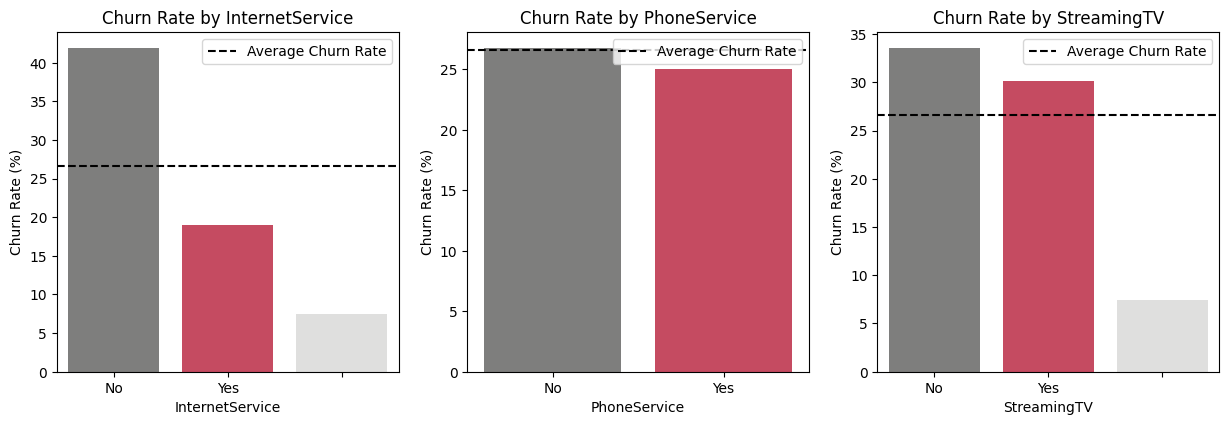

In [ ]:
service_cols = ['InternetService', 'PhoneService', 'StreamingTV']

# Create subplots
plt.figure(figsize=(15, 15))
for i, col in enumerate(service_cols):
    ax = plt.subplot(3, 3, i + 1)
    service_churn = pwc.groupby(col)['Churn'].agg(['mean', 'count'])
    service_churn['churn_rate'] = service_churn['mean'] * 100
    service_churn = service_churn.sort_values('churn_rate', ascending=False)
    sns.barplot(x=service_churn.index, y='churn_rate', data=service_churn, palette = ["#7E7E7D","#DA3654", "#DFDFDE"])
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate (%)')
    plt.xlabel(col)
    plt.axhline(y=pwc['Churn'].mean()*100, color='#000000', linestyle='--', label='Average Churn Rate')
    ax.set_xticklabels(['No', 'Yes'])
    plt.legend()

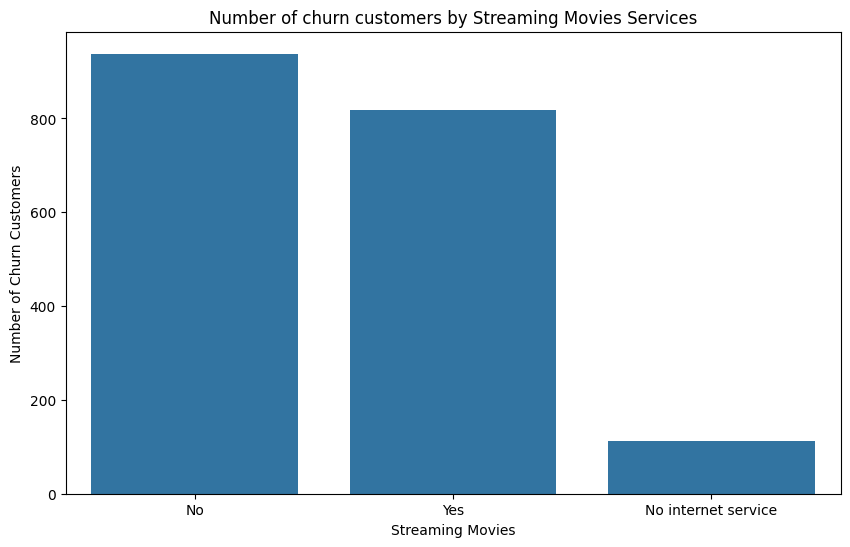

In [ ]:
# Group by Streaming movie and count churned customers
churn_by_movies_service =  pwc[pwc['Churn'] == 1]['StreamingMovies'].value_counts()

# Sort the counts in descending order
churn_by_movies_service = churn_by_movies_service.sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_movies_service.index, y=churn_by_movies_service.values)
plt.xlabel('Streaming Movies')
plt.ylabel('Number of Churn Customers')
plt.title('Number of churn customers by Streaming Movies Services')
plt.show()

In [ ]:
pwc['StreamingMovies'].value_counts()

,count
StreamingMovies,
No,2781
Yes,2731
No internet service,1520


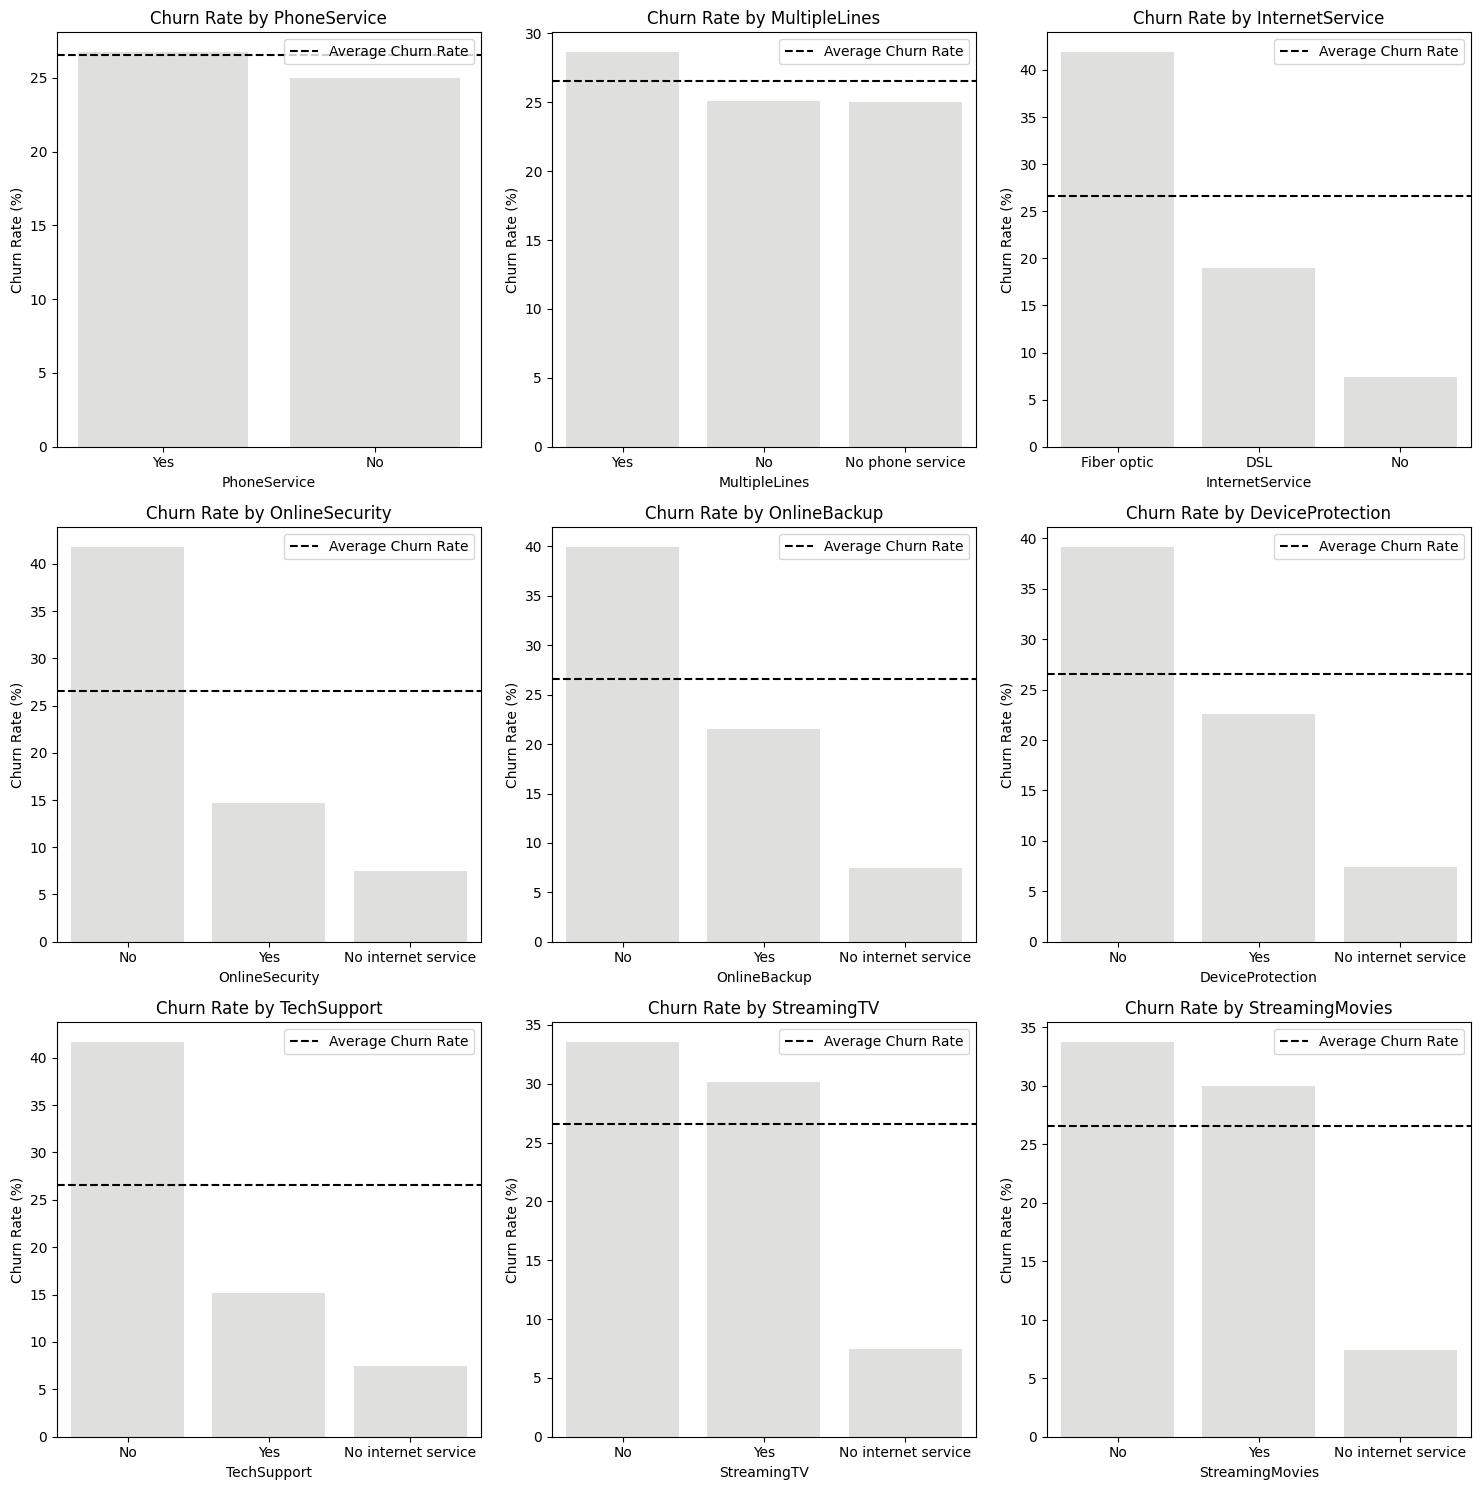

In [ ]:
# List of service-related columns
service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots
plt.figure(figsize=(15, 15))
for i, col in enumerate(service_cols):
    plt.subplot(3, 3, i + 1)
    service_churn = pwc.groupby(col)['Churn'].agg(['mean', 'count'])
    service_churn['churn_rate'] = service_churn['mean'] * 100
    service_churn = service_churn.sort_values('churn_rate', ascending=False)
    sns.barplot(x=service_churn.index, y='churn_rate', data=service_churn, color = '#DFDFDE')
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate (%)')
    plt.xlabel(col)
    plt.axhline(y=pwc['Churn'].mean()*100, color='#000000', linestyle='--', label='Average Churn Rate')
    plt.legend()

plt.tight_layout()
plt.show()

<ipython-input-129-904507f657d8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Churn', y='MonthlyCharges', data=pwc, palette=["#7E7E7D","#DA3654"])
<ipython-input-129-904507f657d8>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


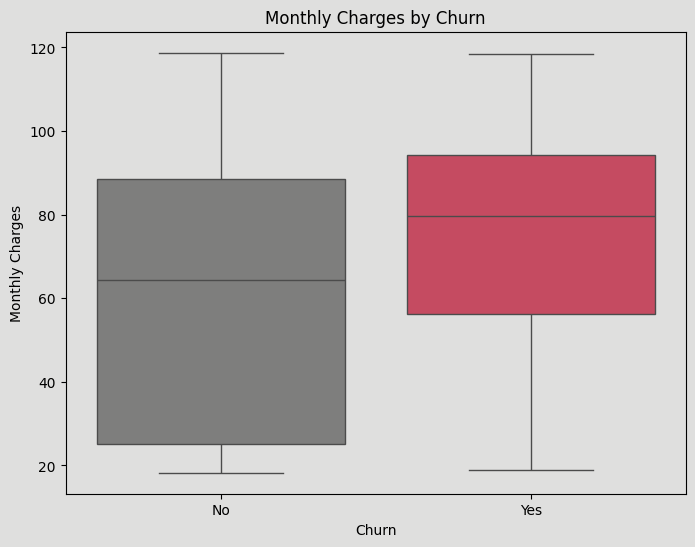

In [ ]:
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_facecolor('#DFDFDE')  # Set background color of the plot to gray
plt.gcf().set_facecolor('#DFDFDE') # Set background color outside the plot to gray
ax = sns.boxplot(x='Churn', y='MonthlyCharges', data=pwc, palette=["#7E7E7D","#DA3654"])
plt.title('Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
ax.set_xticklabels(['No', 'Yes'])
plt.show()

<ipython-input-130-e60f5db4a639>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Churn', y='TotalCharges', data=pwc, palette=["#7E7E7D","#DA3654"])
<ipython-input-130-e60f5db4a639>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


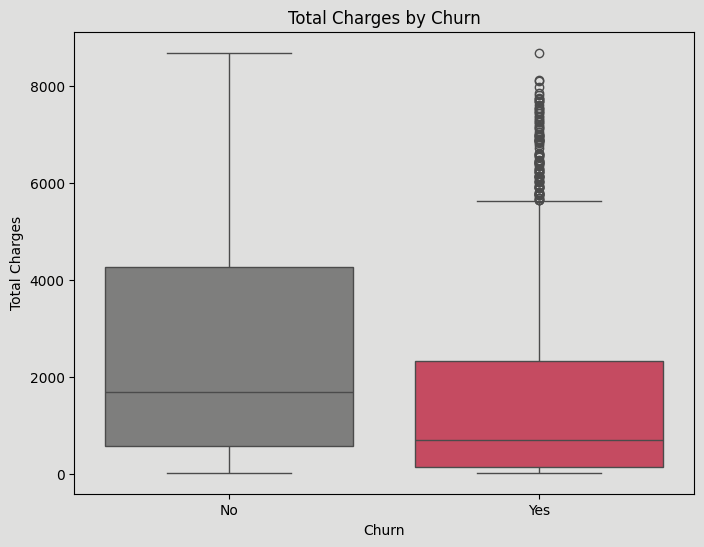

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_facecolor('#DFDFDE')  # Set background color of the plot to gray
plt.gcf().set_facecolor('#DFDFDE') # Set background color outside the plot to gray
ax = sns.boxplot(x='Churn', y='TotalCharges', data=pwc, palette=["#7E7E7D","#DA3654"])
plt.title('Total Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
ax.set_xticklabels(['No', 'Yes'])
plt.show()

<ipython-input-131-3f52e018f03c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='churn_rate', y=billing_churn.index, data=billing_churn, palette=["#7E7E7D","#DA3654"], orient = 'h')
<ipython-input-131-3f52e018f03c>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['No', 'Yes'])
<ipython-input-131-3f52e018f03c>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


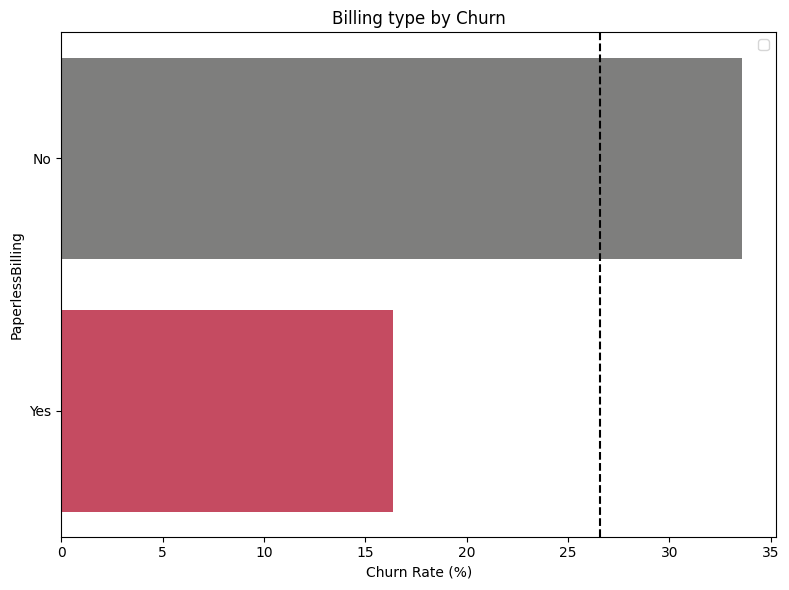

In [ ]:
#Calculate churn rate by billing method (PaperlessBilling)
billing_churn = pwc.groupby('PaperlessBilling')['Churn'].agg(['mean', 'count'])
billing_churn['churn_rate'] = billing_churn['mean'] * 100
billing_churn = billing_churn.sort_values('churn_rate', ascending=False)

# Plot the results with highlighted 'Yes' category
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='churn_rate', y=billing_churn.index, data=billing_churn, palette=["#7E7E7D","#DA3654"], orient = 'h')
plt.title("Billing type by Churn")
plt.xlabel('Churn Rate (%)')
ax.set_yticklabels(['No', 'Yes'])
plt.legend()
plt.axvline(x=pwc['Churn'].mean()*100, color='black', linestyle='--', label='Average Churn Rate')
plt.tight_layout()
plt.show()

<ipython-input-132-a4629788c0f4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='churn_rate', y=contract_churn.index, data=contract_churn, palette=["#7E7E7D","#DA3654","#DFDFDE"], orient = 'h')


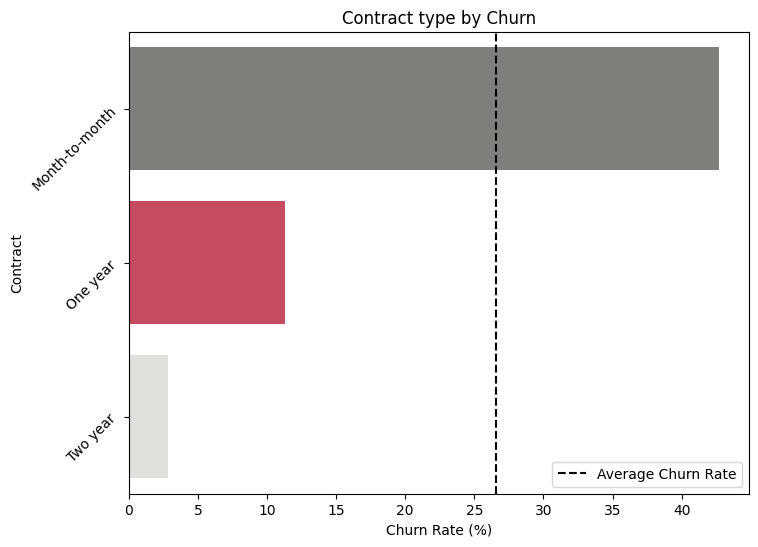

In [ ]:
#Calculate Churn rate by Contract Type
contract_churn = pwc.groupby('Contract')['Churn'].agg(['mean', 'count'])
contract_churn['churn_rate'] = contract_churn['mean'] * 100
contract_churn = contract_churn.sort_values('churn_rate', ascending=False)

# Identify the contract type with the highest churn rate
highlight_contract = contract_churn.index[0]

# Plot churn rate by contract type
plt.figure(figsize=(8, 6))

sns.barplot(x='churn_rate', y=contract_churn.index, data=contract_churn, palette=["#7E7E7D","#DA3654","#DFDFDE"], orient = 'h')
plt.title("Contract type by Churn")
plt.xlabel('Churn Rate (%)')
plt.yticks(rotation = 45)

plt.axvline(x=pwc['Churn'].mean()*100, color='black', linestyle='--', label='Average Churn Rate')
plt.legend()
plt.show()

<ipython-input-133-dca410b2d815>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='churn_rate', y=payment_churn.index, data=payment_churn, palette=["#7E7E7D","#DA3654", "#DFDFDE","#EB8C22"], orient = 'h')


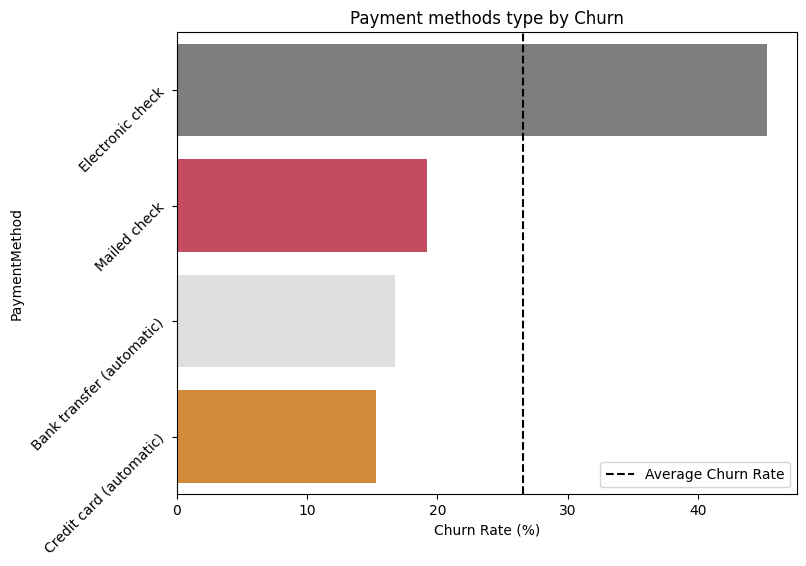

In [ ]:
# Calculate churn rate by payment method
payment_churn = pwc.groupby('PaymentMethod')['Churn'].agg(['mean', 'count'])
payment_churn['churn_rate'] = payment_churn['mean'] * 100
payment_churn = payment_churn.sort_values('churn_rate', ascending=False)

# Identify the payment method with the highest churn rate
highlight = payment_churn.index[0]

# Plot churn rate by payment method
plt.figure(figsize=(8, 6))
sns.barplot(x='churn_rate', y=payment_churn.index, data=payment_churn, palette=["#7E7E7D","#DA3654", "#DFDFDE","#EB8C22"], orient = 'h')
plt.title("Payment methods type by Churn")
plt.xlabel('Churn Rate (%)')
plt.axvline(x=pwc['Churn'].mean()*100, color='black', linestyle='--', label='Average Churn Rate')
plt.yticks(rotation=45)
plt.legend()
plt.show()

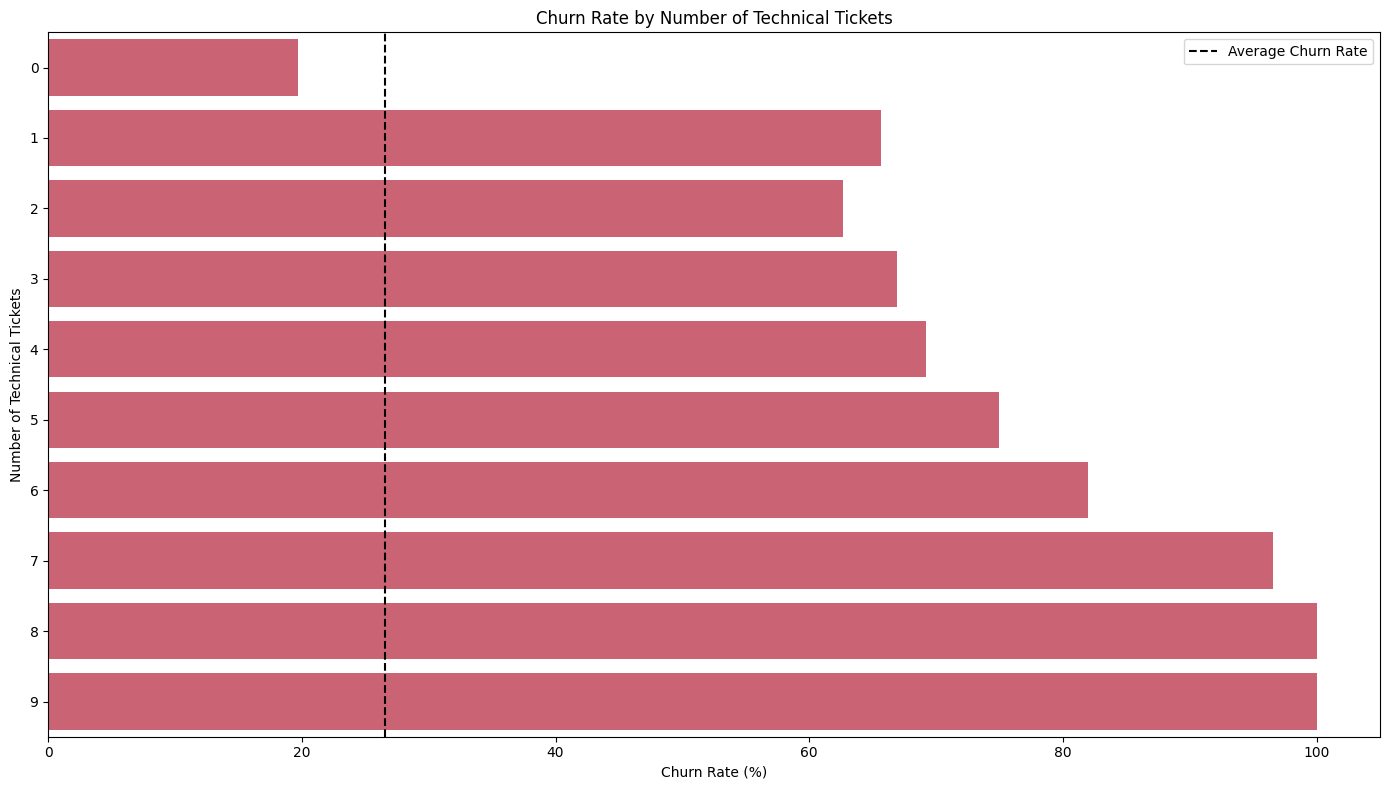

In [ ]:
# Calculate churn rate by number of technical tickets
tech_churn = pwc.groupby('numTechTickets')['Churn'].agg(['mean', 'count'])
tech_churn['churn_rate'] = tech_churn['mean'] * 100
tech_churn = tech_churn.sort_values('churn_rate', ascending=False)

# Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(x='churn_rate', y=tech_churn.index, data=tech_churn, color = '#DB536A', orient ="h")
plt.title('Churn Rate by Number of Technical Tickets')
plt.xlabel('Churn Rate (%)')
plt.ylabel('Number of Technical Tickets')
plt.axvline(x=pwc['Churn'].mean()*100, color='black', linestyle='--', label='Average Churn Rate')
plt.legend()
plt.tight_layout()
plt.show()

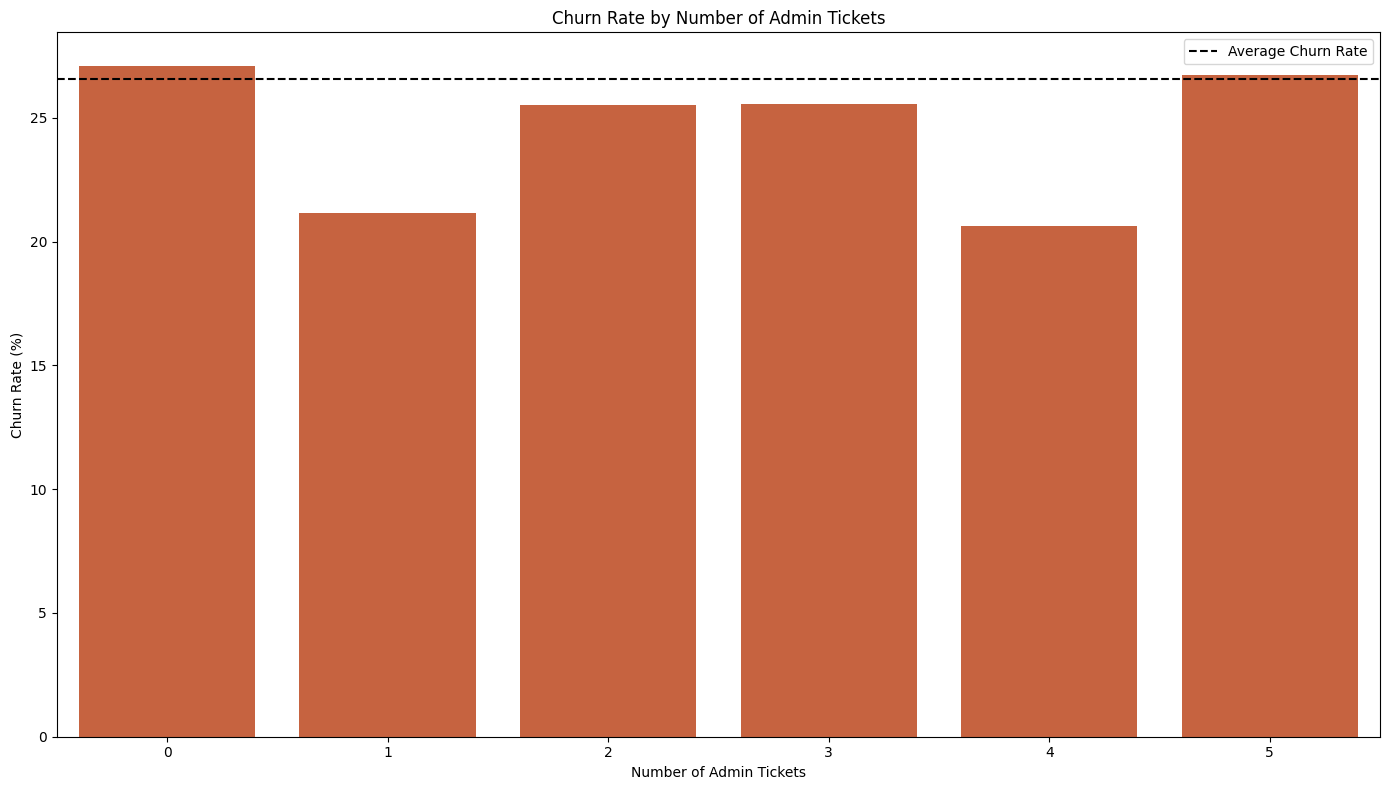

In [ ]:
# Calculate churn rate by number of admin tickets
admin_churn = pwc.groupby('numAdminTickets')['Churn'].agg(['mean', 'count'])
admin_churn['churn_rate'] = admin_churn['mean'] * 100
admin_churn = admin_churn.sort_values('churn_rate', ascending=False)

# Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(x=admin_churn.index, y='churn_rate', data=admin_churn, color='#DC582A')
plt.title('Churn Rate by Number of Admin Tickets')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Number of Admin Tickets')
plt.axhline(y=pwc['Churn'].mean()*100, color='black', linestyle='--', label='Average Churn Rate')
plt.legend()
plt.tight_layout()
plt.show()

- Customers with short tenure (less than 20 months) tend to churn more easily than customers who have used the service for a longer time (>20 months)
- In demographics, there is almost nothing significant, only senior citizens have a fairly high churn rate (>40% churn rate)
- Services such as Internet, Phone, Streaming TV and Streaming Movies all have in common that when customers use it, if there is something unsatisfactory, the churn rate will also increase.
  + In Internet Services, Fibre optic has a very high number of churn customers (>40% churn rate) (alarming). DSL's churn rate is not as high as Fibre Optic's but still very high (about 20%)
  + Regarding Phone Services, almost all customers using telecom services also use phone services, so the churn rate is similar to the general rate (about 24%)
  + Streaming TV and Streaming Movies have a similar customer usage rate and churn rate (partly due to the number of customers using Internet services (nearly 30% churn rate if used)
- Multiple Line is also affected by Phone Service, so when used, it also increases the churn rate (> 25%)
- Customer care services (Online Security, Online Backup, Device Protection, Tech Support) are all ignored by customers, but when used, the churn rate is quite low. This may affect the problem of Internet Service too seriously, leading to customers not wanting to use customer care services. Or the number of customers needing customer care is too much, so the telecom company cannot support all of them. so customers have not had time to use it before they churn.
- Customers who register to pay monthly (> 40%) have a higher churn rate than customers who pay under a 1-year contract. The reason may stem from the fact that Internet and Phone services do not satisfy their needs, so when customers use them in the beginning, they tend to compare them with competing telecom companies and increase the possibility of churning more.
- Using paperless billing services helps reduce the time and cost of giving bills to customers, but at the same time, the use of the service has not been done well, leading to an increase in the churn rate (about 33%)
- Payment method is also a factor that affects the churn rate of customers, especially Electronics Check has a much higher churn rate than other payment methods (> 45%)
- The number of Technical Tickets also increases the churn rate when customers using the service all have a churn rate of over 60%

# 5. Feature Engineering

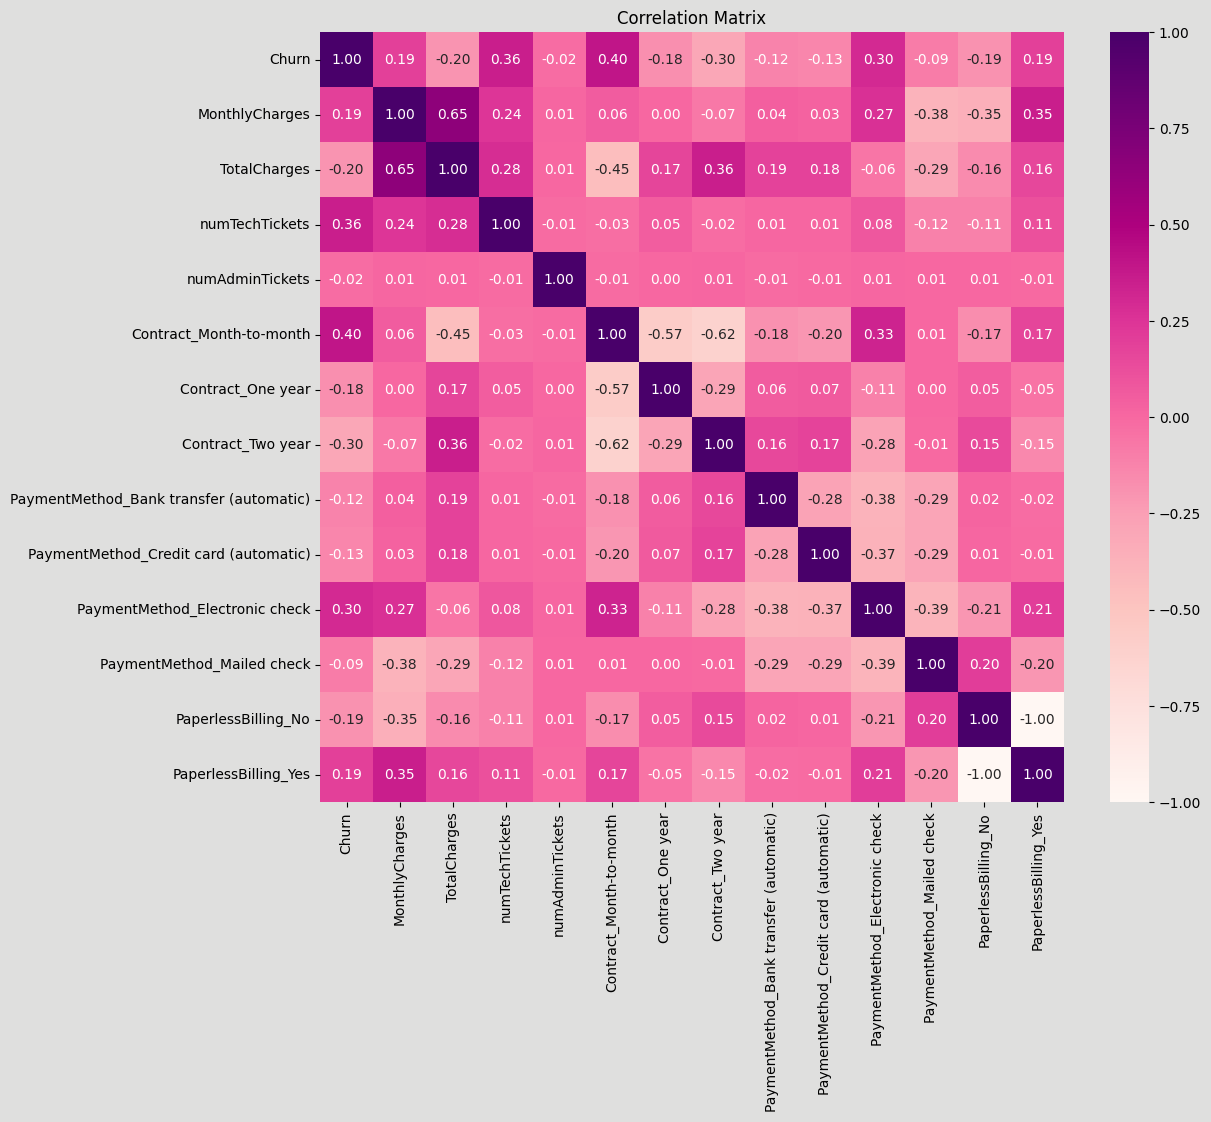

In [ ]:
# Correlation matrix
correlation_cols = ['Churn', 'MonthlyCharges', 'TotalCharges', 'Contract', 'PaymentMethod', 'PaperlessBilling', 'numTechTickets','numAdminTickets']
correlation = pd.get_dummies(pwc[correlation_cols])
correlation_matrix = correlation.corr()
plt.figure(figsize=(12, 10))
ax = plt.gca()
ax.set_facecolor('#DFDFDE')  # Set background color of the plot to gray
plt.gcf().set_facecolor('#DFDFDE') # Set background color outside the plot to gray
oranges = sns.color_palette("RdPu", as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap=oranges, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Feature Encoding

In [ ]:
# Encoding categorical
pwc['gender'] = pwc['gender'].map({'Female': 1, 'Male': 0})
pwc['Partner'] = pwc['Partner'].map({'Yes': 1, 'No': 0})
pwc['Dependents'] = pwc['Dependents'].map({'Yes': 1, 'No': 0})
pwc['PhoneService'] = pwc['PhoneService'].map({'Yes': 1, 'No': 0})
pwc['PaperlessBilling'] = pwc['PaperlessBilling'].map({'Yes': 1, 'No': 0})
pwc['StreamingMovies'] = pwc['StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
pwc['StreamingTV'] = pwc['StreamingTV'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
pwc['MultipleLines'] = pwc['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': 0})
pwc['OnlineSecurity'] = pwc['OnlineSecurity'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
pwc['OnlineBackup'] = pwc['OnlineBackup'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
pwc['DeviceProtection'] = pwc['DeviceProtection'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
pwc['TechSupport'] = pwc['TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service': 0})

In [ ]:
# One-hot encode the 'Contract' column
contract_dummies = pd.get_dummies(pwc['Contract'], prefix='Contract')

# Concatenate the dummy variables with the original dataframe
data = pd.concat([pwc, contract_dummies], axis=1)

# Drop the original 'Contract' column
data.drop('Contract', axis=1, inplace=True)

# Display the first few rows to verify the changes
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,tenure_group,Contract_Month-to-month,Contract_One year,Contract_Two year
0,7590-VHVEG,1,0,1,0,1,0,0,DSL,0,...,Electronic check,29.85,29.85,0,0,0,1-10,True,False,False
1,5575-GNVDE,0,0,0,0,34,1,0,DSL,1,...,Mailed check,56.95,1889.50,0,0,0,31-40,False,True,False
2,3668-QPYBK,0,0,0,0,2,1,0,DSL,1,...,Mailed check,53.85,108.15,0,0,1,1-10,True,False,False
3,7795-CFOCW,0,0,0,0,45,0,0,DSL,1,...,Bank transfer (automatic),42.30,1840.75,0,3,0,41-50,False,True,False
4,9237-HQITU,1,0,0,0,2,1,0,Fiber optic,0,...,Electronic check,70.70,151.65,0,0,1,1-10,True,False,False


In [ ]:
# One-hot encode the 'PaymentMethod' column
payment_dummies = pd.get_dummies(data['PaymentMethod'], prefix='PaymentMethod')

# One-hot encode the 'InternetService' column
internet_dummies = pd.get_dummies(data['InternetService'], prefix='InternetService')

# Concatenate the dummy variables with the original dataframe
data = pd.concat([data, payment_dummies, internet_dummies], axis=1)

# Drop the original 'PaymentMethod' and 'InternetService' columns
data.drop(['PaymentMethod', 'InternetService'], axis=1, inplace=True)

# Display the first few rows to verify the changes
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,1,0,1,0,0,0,1,...,True,False,False,False,False,True,False,True,False,False
1,5575-GNVDE,0,0,0,0,34,1,0,1,0,...,False,True,False,False,False,False,True,True,False,False
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,True,False,False,False,False,False,True,True,False,False
3,7795-CFOCW,0,0,0,0,45,0,0,1,0,...,False,True,False,True,False,False,False,True,False,False
4,9237-HQITU,1,0,0,0,2,1,0,0,0,...,True,False,False,False,False,True,False,False,True,False


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for standardization
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print(data[numerical_cols].describe())

             tenure  MonthlyCharges  TotalCharges
count  7.032000e+03    7.032000e+03  7.032000e+03
mean  -1.126643e-16    6.062651e-17 -1.119064e-16
std    1.000071e+00    1.000071e+00  1.000071e+00
min   -1.280248e+00   -1.547283e+00 -9.990692e-01
25%   -9.542963e-01   -9.709769e-01 -8.302488e-01
50%   -1.394171e-01    1.845440e-01 -3.908151e-01
75%    9.199259e-01    8.331482e-01  6.668271e-01
max    1.612573e+00    1.793381e+00  2.824261e+00


In [ ]:
pwc[['numAdminTickets','numTechTickets']].describe()

,numAdminTickets,numTechTickets
count,7032.000000,7032.000000
mean,0.514932,0.420222
std,1.273921,1.250984
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,5.000000,9.000000


In [ ]:
pwc['Support_Ticket_Ratio'] = pwc['numTechTickets'] / (pwc['numAdminTickets'] + 1)
pwc['Support_Ticket_Ratio'].value_counts()

,count
Support_Ticket_Ratio,
0.000000,6062
1.000000,223
2.000000,170
3.000000,132
4.000000,113
5.000000,99
6.000000,63
0.333333,28
7.000000,22


Suppose the number of Technical Ticket will take place before the issuance of a number of Admin Ticket. This means that in one repair, a customer can use many technical Tickets at one time but can only issue 1 Admin Ticket. So to create a measurement index for customer satisfaction when using customer care service, use the number of Technical Tickets divided by (number of Admin Ticket +1) (limit the number of Admin Ticket = 0 to affect the calculation result).

<ipython-input-143-d14475af24bd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Churn', y='Support_Ticket_Ratio', data=pwc, palette=['#DA3654'])
<ipython-input-143-d14475af24bd>:2: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(x='Churn', y='Support_Ticket_Ratio', data=pwc, palette=['#DA3654'])
<ipython-input-143-d14475af24bd>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


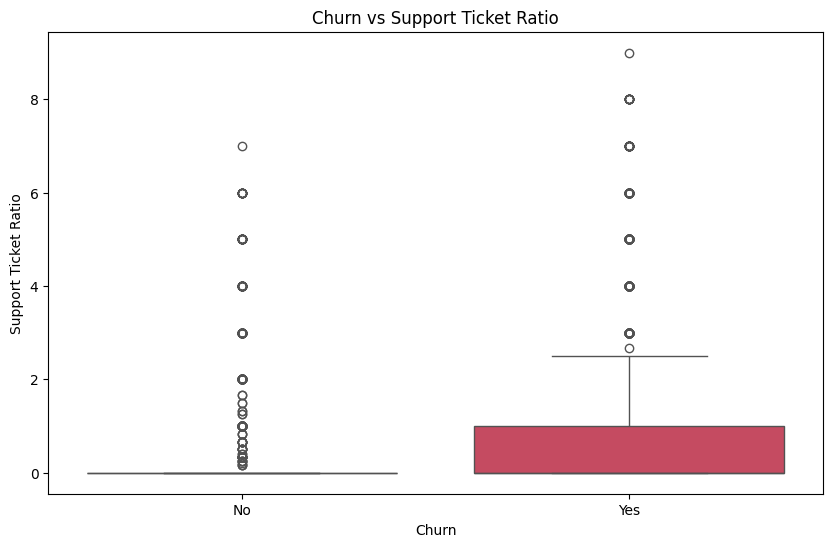

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Churn', y='Support_Ticket_Ratio', data=pwc, palette=['#DA3654'])
plt.xlabel('Churn')
plt.ylabel('Support Ticket Ratio')
plt.title('Churn vs Support Ticket Ratio')
ax.set_xticklabels(['No', 'Yes'])
plt.show()

It can be seen that when applying Support Ticket Ratio, the churn rate will appear more when using support tickets. In addition, using many customer services also increases the churn rate (Outliers of the churn side are higher than the non-churn side). => It can be seen that the current customer care service quality is still not good enough to satisfy the needs and the continuous use of customer care shows that the quality of work of the technical apartment is not good.

# 6. Modelling


In [ ]:
pwc.drop(columns = ['customerID', 'tenure_group'], inplace=True)

Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Instead of using the original 'pwc' dataframe, use the 'data' dataframe
# which has been properly encoded.
X = pwc.drop(columns=['Churn'])
y = pwc['Churn']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Loop through categorical columns and apply Label Encoding
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1412  137]
 [ 180  381]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1549
           1       0.74      0.68      0.71       561

    accuracy                           0.85      2110
   macro avg       0.81      0.80      0.80      2110
weighted avg       0.85      0.85      0.85      2110



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


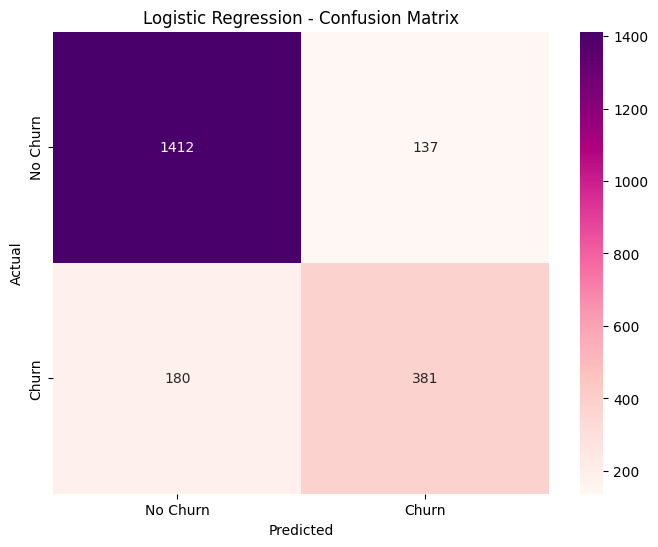

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

Decision Tree

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Tuned Decision Tree - Confusion Matrix:
[[1397  152]
 [ 209  352]]

Tuned Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1549
           1       0.70      0.63      0.66       561

    accuracy                           0.83      2110
   macro avg       0.78      0.76      0.77      2110
weighted avg       0.82      0.83      0.83      2110



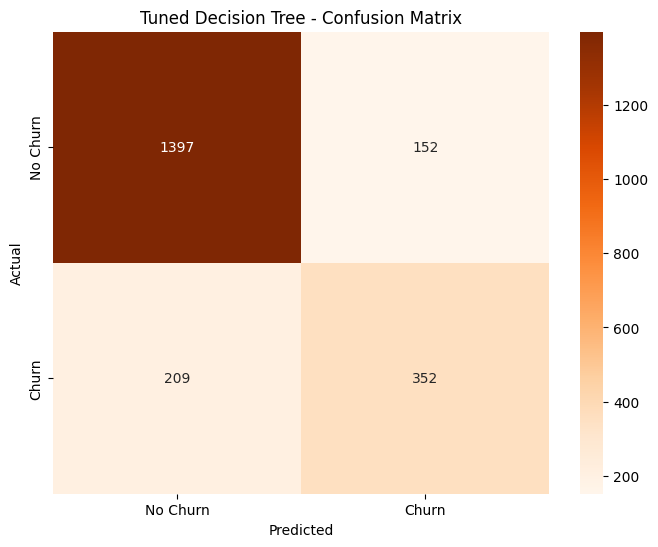

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree model
dtree = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the Decision Tree model with the best parameters
dtree_best = DecisionTreeClassifier(**best_params)
dtree_best.fit(X_train, y_train)

# Make predictions
y_pred_dtree_best = dtree_best.predict(X_test)

# Evaluate the model
print("Tuned Decision Tree - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dtree_best))
print("\nTuned Decision Tree - Classification Report:")
print(classification_report(y_test, y_pred_dtree_best))

# Compute the confusion matrix for the tuned Decision Tree
cm_dtree_best = confusion_matrix(y_test, y_pred_dtree_best)

# Plot the confusion matrix for the tuned Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dtree_best, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Tuned Decision Tree - Confusion Matrix')
plt.show()

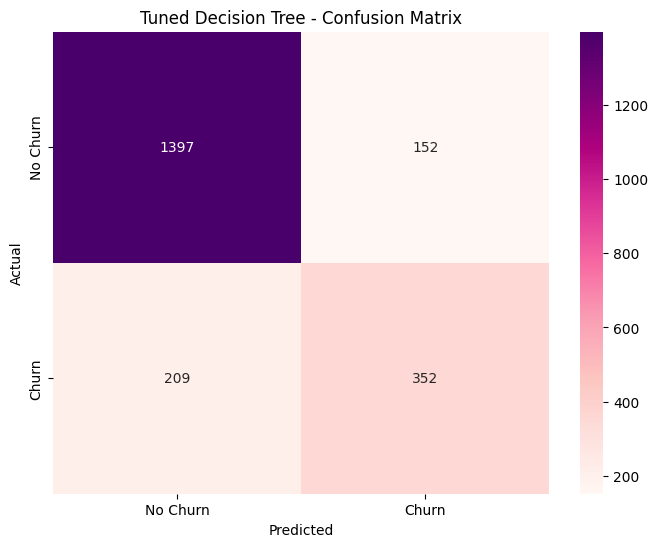

In [ ]:
# Compute the confusion matrix for the tuned Decision Tree
cm_dtree_best = confusion_matrix(y_test, y_pred_dtree_best)

# Plot the confusion matrix for the tuned Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dtree_best, annot=True, fmt='d', cmap='RdPu', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Tuned Decision Tree - Confusion Matrix')
plt.show()

Random Forest

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py

Best parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Tuned Random Forest - Confusion Matrix:
[[1416  133]
 [ 179  382]]

Tuned Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1549
           1       0.74      0.68      0.71       561

    accuracy                           0.85      2110
   macro avg       0.81      0.80      0.81      2110
weighted avg       0.85      0.85      0.85      2110



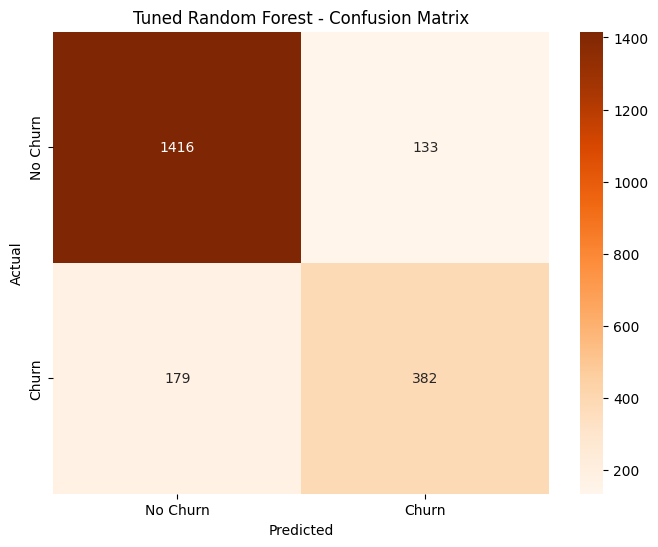

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print(f"Best parameters: {best_params_rf}")

# Train the Random Forest model with the best parameters
rf_best = RandomForestClassifier(**best_params_rf, random_state=42)
rf_best.fit(X_train, y_train)

# Make predictions
y_pred_rf_best = rf_best.predict(X_test)

# Evaluate the model
print("Tuned Random Forest - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_best))
print("\nTuned Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf_best))

# Compute the confusion matrix for the tuned Random Forest
cm_rf_best = confusion_matrix(y_test, y_pred_rf_best)

# Plot the confusion matrix for the tuned Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_best, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Tuned Random Forest - Confusion Matrix')
plt.show()

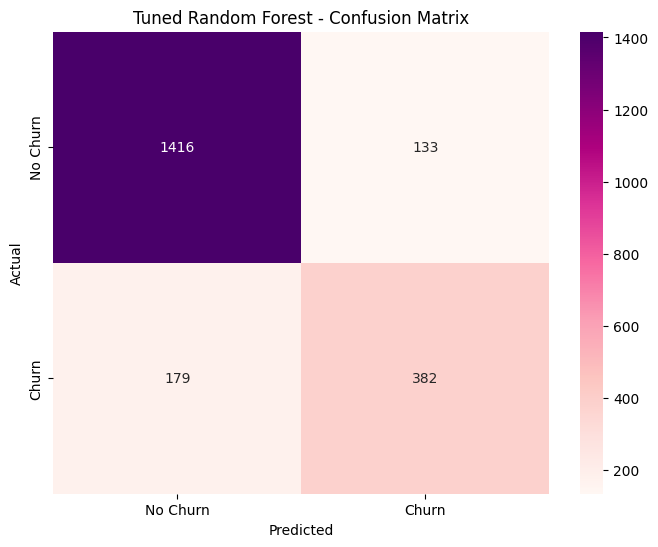

In [ ]:
#Compute the confusion matrix for the tuned Random Forest
cm_rf_best = confusion_matrix(y_test, y_pred_rf_best)

# Plot the confusion matrix for the tuned Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_best, annot=True, fmt='d', cmap='RdPu', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Tuned Random Forest - Confusion Matrix')
plt.show()

SVM - Confusion Matrix:
[[1406  143]
 [ 189  372]]

SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1549
           1       0.72      0.66      0.69       561

    accuracy                           0.84      2110
   macro avg       0.80      0.79      0.79      2110
weighted avg       0.84      0.84      0.84      2110



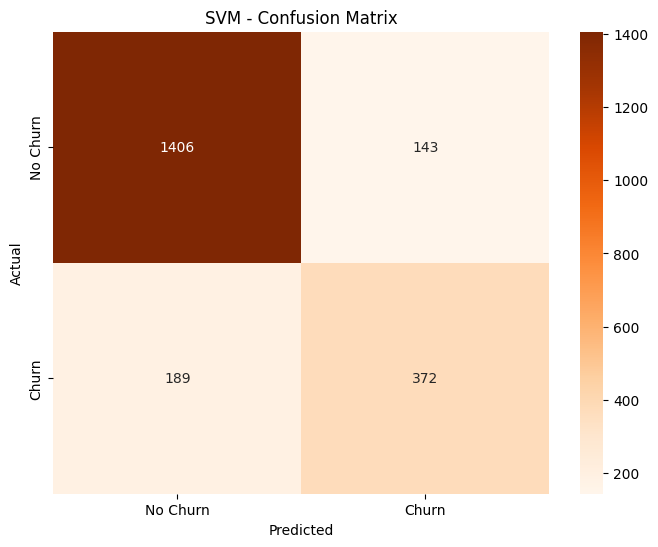

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("\nSVM - Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Compute the confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM - Confusion Matrix')
plt.show()

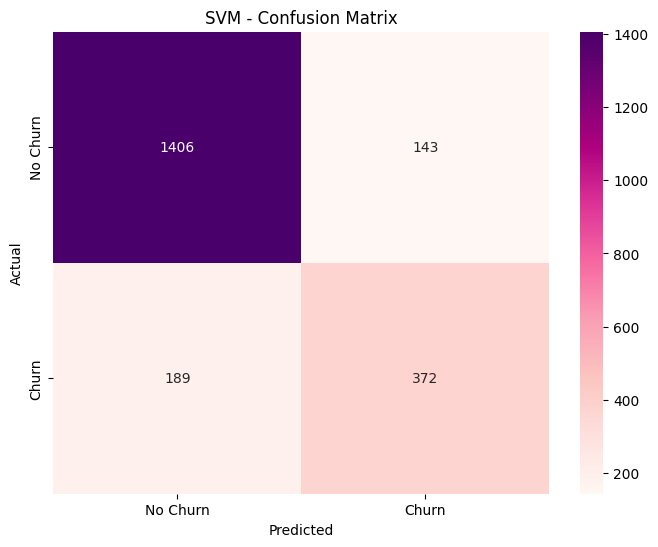

In [ ]:
# Compute the confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='RdPu', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM - Confusion Matrix')
plt.show()

# 7. Model Evaluation

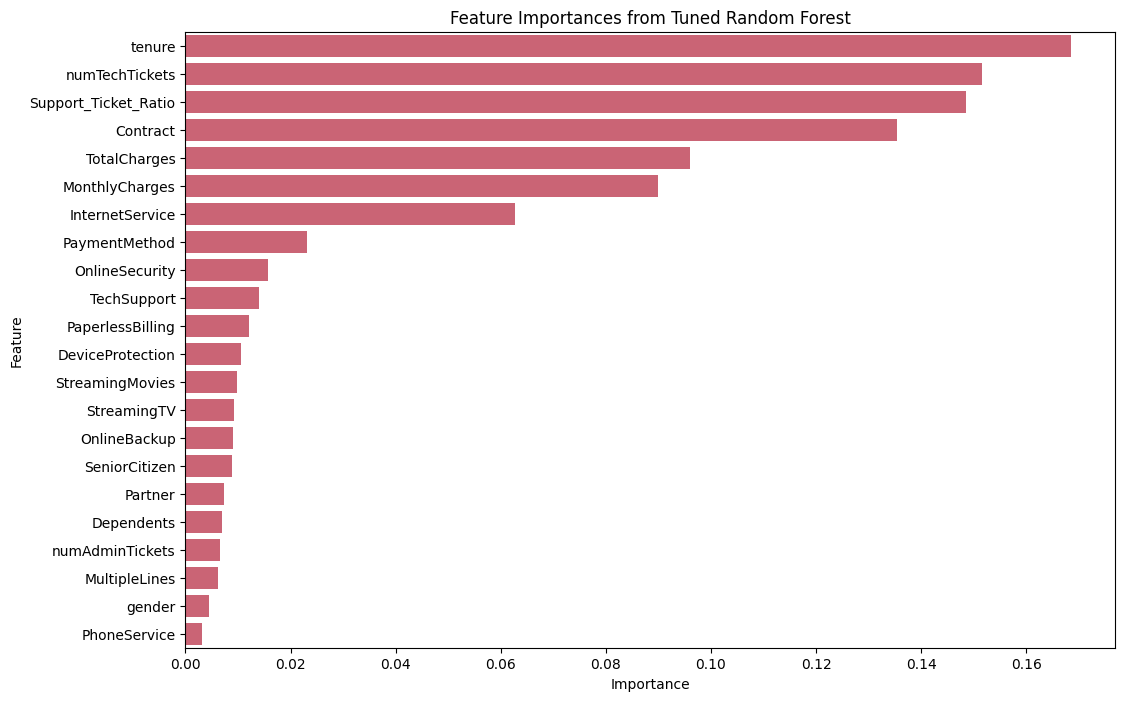

In [ ]:
# Get feature importances from the tuned Random Forest model
feature_importances = rf_best.feature_importances_

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, color = '#DB536A')
plt.title('Feature Importances from Tuned Random Forest')
plt.show()

# 8. Insights and Recommendations

## Key Factors Driving Churn
- Tenure has the greatest impact on churn rate with the feature importance ratio reaching 0.16, indicating that the initial time of using the service by the customer has a great impact on the churn rate.
- Number of Tech Tickets and Support Tech Ratio have no less significant impacts with around 0.15 and 0.14 respectively, indicating that the level of technical staff and the continuous appearance of the number of tech tickets are creating an increase in churn rate
- Month-to-month contracts, monthly fees and total fees are also important factors when the monthly service price is not commensurate with the service provided by the company, affecting the level of customer satisfaction.
- Internet service issues (Fiber Optic) are also an important factor with a ratio of 0.7 and payment method (E-Check - 0.3) also affects the customer experience.
## How to reduce Churn
1. Improve quality: Enhance the skills of technical staff

To elevate service quality, invest in comprehensive training programs for technical staff. Focus on upskilling them in troubleshooting, network maintenance, and emerging technologies like fiber optics and 5G integration. Regular workshops, certifications (e.g., Cisco or CompTIA), and hands-on simulations can sharpen their expertise, reducing downtime and improving response times to customer issues.
2. Increase customer loyalty: Offer preferential prices to customers using services under long-term contracts

Boost customer retention by introducing tiered discounts for long-term commitments. For example, offer a 10% discount on monthly bills for 12-month contracts, 15% for 24 months, and exclusive perks like free upgrades or priority support for longer terms. This incentivizes loyalty while ensuring predictable revenue streams.

3. Adjust reasonable and competitive prices: Revise monthly service packages with more reasonable pricing

Conduct a market analysis to benchmark your pricing against competitors, then redesign monthly service packages to balance affordability and value. Introduce flexible tiers—e.g., a basic plan for budget-conscious users, a mid-tier with added features like faster speeds, and a premium option with unlimited data or bundled services. Transparent pricing and periodic promotions can enhance perceived value.

4. Improve service infrastructure: Enhance Internet Service (Fiber Optic, DSL), Phone Service, and Payment Methods (Electronic Check)

To strengthen service infrastructure, prioritize a multi-faceted upgrade. For Internet Service, accelerate fiber optic deployment to replace outdated DSL where feasible, targeting at least 1 Gbps speeds in urban areas to meet rising demand for streaming and remote work. In rural regions, optimize DSL with vectoring technology to boost reliability until fiber expansion is viable. Invest in redundant network nodes to minimize outages and deploy QoS (Quality of Service) tools to prioritize bandwidth for critical applications. For Phone Service, transition to VoIP platforms with HD voice capabilities, integrating features like call forwarding and virtual numbers to enhance flexibility. Partner with local telecoms to expand coverage and reduce latency. For Payment Methods, streamline electronic check processing by integrating secure, user-friendly platforms like ACH payments, ensuring encryption and real-time transaction confirmations. Add mobile payment options (e.g., PayPal, Apple Pay) and a self-service portal for account management, reducing friction for customers. Allocate budget to predictive maintenance—using AI-driven analytics to preempt infrastructure failures—and conduct regular audits to ensure scalability. This holistic approach will future-proof your services, improve customer satisfaction, and maintain a competitive edge in a fast-evolving market.